# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
customers.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [4]:
#There's no missing data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
#Region and channel shoul be converted
print(customers.Region.unique())
print(customers.Channel.unique())

[3 1 2]
[2 1]


In [6]:
#There are columns highly correlated
customers.corr()

Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641    0.205497  
Frozen                   -0.131525    0.390947  
Detergents_Paper          1.000000    0.069291  
Delicassen                0.069291    1.000000

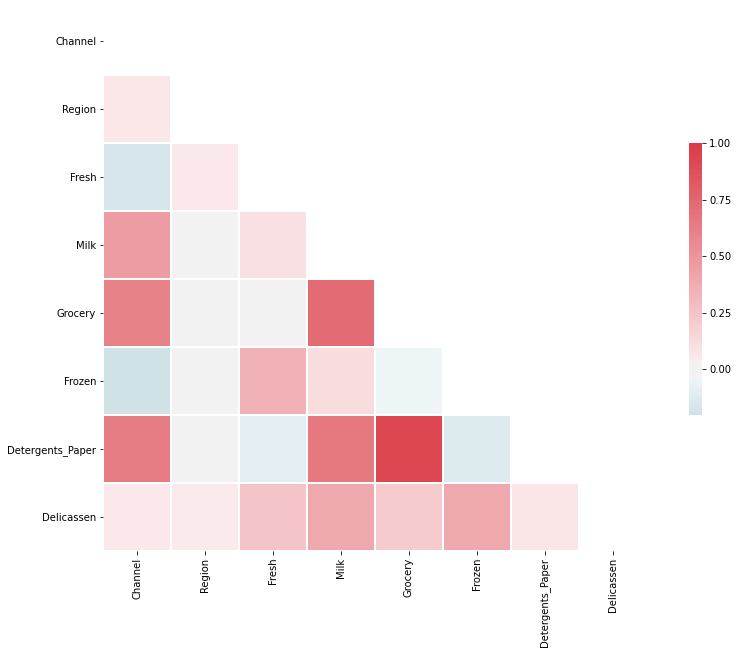

In [7]:
corr=customers.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [8]:
#There are some outliers
customers.describe([x/100 for x in range(90,100)]).T

count          mean           std   min     50%      90%  \
Channel           440.0      1.322727      0.468052   1.0     1.0      2.0   
Region            440.0      2.543182      0.774272   1.0     3.0      3.0   
Fresh             440.0  12000.297727  12647.328865   3.0  8504.0  27090.5   
Milk              440.0   5796.265909   7380.377175  55.0  3627.0  12229.9   
Grocery           440.0   7951.277273   9503.162829   3.0  4755.5  18910.1   
Frozen            440.0   3071.931818   4854.673333  25.0  1526.0   7545.3   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   816.5   7438.3   
Delicassen        440.0   1524.870455   2820.105937   3.0   965.5   2945.9   

                       91%       92%       93%       94%       95%       96%  \
Channel               2.00      2.00      2.00      2.00      2.00      2.00   
Region                3.00      3.00      3.00      3.00      3.00      3.00   
Fresh             28075.44  29725.88  31083.28  32409.30  36818.50  39426.44   
Milk              12785.35  13250.56  14705.80  15727.98  16843.40  20788.76   
Grocery           19831.19  20386.16  21541.53  22241.40  24033.50  26546.12   
Frozen             8007.56   8305.88   8692.27   9475.32   9930.75  10985.76   
Detergents_Paper   7849.85   8672.64   9048.92   9917.18  12043.20  12611.68   
Delicassen         3108.92   3181.88   3491.94   3942.58   4485.40   5120.44   

                       97%       98%       99%       max  
Channel               2.00      2.00      2.00       2.0  
Region                3.00      3.00      3.00       3.0  
Fresh             42705.42  46047.66  56082.61  112151.0  
Milk              22947.87  27659.88  37610.06   73498.0  
Grocery           28856.23  32437.84  43435.74   92780.0  
Frozen            13208.04  15807.14  17964.82   60869.0  
Detergents_Paper  14148.47  17927.88  22571.61   40827.0  
Delicassen         5202.43   6276.84   8274.66   47943.0

C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Us

<Figure size 432x288 with 0 Axes>

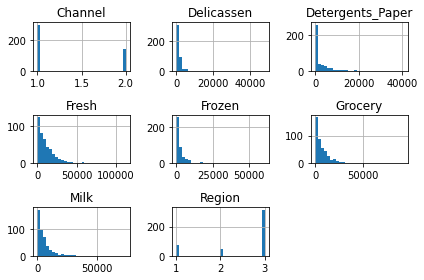

In [9]:
plt.figure()
customers.hist(bins=30)
plt.tight_layout()

In [10]:
#Nocierto Pareto mentiras con clientes
pareto1=customers.iloc[:,2:].copy()
pareto1['Total']=pareto1.sum(axis=1)
for column in pareto1.columns[2:]:
    cut=pareto1[column].quantile(.8)
    top20=pareto1[pareto1[column]>=cut][column].sum()
    total=pareto1[column].sum()
    print(f'Porcentaje de {column} comprado por el 20 porciento que compró más de la población: {top20/total}')

Porcentaje de Grocery comprado por el 20 porciento que compró más de la población: 0.5568736526607218
Porcentaje de Frozen comprado por el 20 porciento que compró más de la población: 0.6238138571375726
Porcentaje de Detergents_Paper comprado por el 20 porciento que compró más de la población: 0.697065994035605
Porcentaje de Delicassen comprado por el 20 porciento que compró más de la población: 0.5738937584861903
Porcentaje de Total comprado por el 20 porciento que compró más de la población: 0.42904839426792984


In [11]:
pareto2=pd.DataFrame(customers.iloc[:,2:].copy().sum(),columns=['Total']).sort_values('Total',ascending=False)
pareto2['Porcentaje_acum']=pareto2["Total"].cumsum()/pareto2["Total"].sum()*100
pareto2

Total  Porcentaje_acum
Fresh             5280131        36.117042
Grocery           3498562        60.047833
Milk              2550357        77.492732
Frozen            1351650        86.738261
Detergents_Paper  1267857        95.410630
Delicassen         670943       100.000000

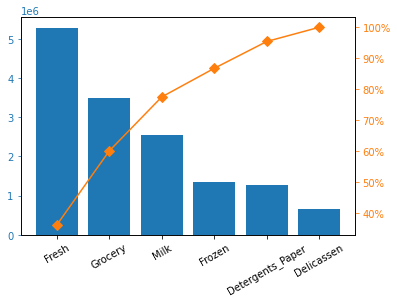

In [12]:
#Nocierto Pareto mentiras con productos
fig, ax = plt.subplots(facecolor='white')
plt.xticks(rotation=30)
ax.bar(pareto2.index, pareto2["Total"], color="C0")
ax2 = ax.twinx()
ax2.plot(pareto2.index, pareto2["Porcentaje_acum"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [13]:
customers_clean=customers.copy()
for column in customers_clean.columns[2:]:
    customers_clean=customers_clean[customers_clean[column]<customers[column].quantile(.99)]
customers_clean.reset_index(inplace=True,drop=True)
#customers_dummies=pd.get

In [14]:
customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 8 columns):
Channel             421 non-null int64
Region              421 non-null int64
Fresh               421 non-null int64
Milk                421 non-null int64
Grocery             421 non-null int64
Frozen              421 non-null int64
Detergents_Paper    421 non-null int64
Delicassen          421 non-null int64
dtypes: int64(8)
memory usage: 26.4 KB


In [15]:
customers_clean.describe([x/10 for x in range(10)]).T

count          mean          std   min    0%     10%  \
Channel           421.0      1.320665     0.467288   1.0   1.0     1.0   
Region            421.0      2.536817     0.778704   1.0   1.0     1.0   
Fresh             421.0  10752.819477  9975.433966   3.0   3.0   894.0   
Milk              421.0   5112.149644  5048.574442  55.0  55.0   879.0   
Grocery           421.0   7134.558195  7052.204654   3.0   3.0  1381.0   
Frozen            421.0   2598.681710  2998.285143  25.0  25.0   282.0   
Detergents_Paper  421.0   2547.320665  3594.282986   3.0   3.0    96.0   
Delicassen        421.0   1261.033254  1240.865876   3.0   3.0   172.0   

                     20%     30%     40%     50%      60%      70%      80%  \
Channel              1.0     1.0     1.0     1.0      1.0      2.0      2.0   
Region               2.0     3.0     3.0     3.0      3.0      3.0      3.0   
Fresh             2532.0  4042.0  5924.0  8040.0  10379.0  13265.0  17770.0   
Milk              1222.0  1860.0  2495.0  3587.0   4753.0   6243.0   7845.0   
Grocery           1939.0  2453.0  3250.0  4602.0   6235.0   8469.0  11522.0   
Frozen             547.0   839.0  1093.0  1457.0   2077.0   2714.0   3941.0   
Detergents_Paper   212.0   311.0   469.0   811.0   1377.0   2970.0   4573.0   
Delicassen         317.0   497.0   689.0   898.0   1142.0   1476.0   1894.0   

                      90%      max  
Channel               2.0      2.0  
Region                3.0      3.0  
Fresh             24904.0  53205.0  
Milk              11114.0  29892.0  
Grocery           16709.0  39694.0  
Frozen             6404.0  17866.0  
Detergents_Paper   7015.0  19410.0  
Delicassen         2749.0   7844.0

In [16]:
customers_dummies=pd.get_dummies(customers_clean,columns=['Channel','Region'],drop_first=True)
customers_dummies.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Channel_2  \
0  12669  9656     7561     214              2674        1338          1   
1   7057  9810     9568    1762              3293        1776          1   
2   6353  8808     7684    2405              3516        7844          1   
3  13265  1196     4221    6404               507        1788          0   
4  22615  5410     7198    3915              1777        5185          1   

   Region_2  Region_3  
0         0         1  
1         0         1  
2         0         1  
3         0         1  
4         0         1

In [17]:
customers_dummies.drop('Grocery',axis=1,inplace=True)

In [18]:
customers_dummies.corr()

Fresh      Milk    Frozen  Detergents_Paper  Delicassen  \
Fresh             1.000000 -0.126940  0.222159         -0.241204    0.127074   
Milk             -0.126940  1.000000 -0.041375          0.698731    0.382481   
Frozen            0.222159 -0.041375  1.000000         -0.191002    0.128390   
Detergents_Paper -0.241204  0.698731 -0.191002          1.000000    0.178034   
Delicassen        0.127074  0.382481  0.128390          0.178034    1.000000   
Channel_2        -0.174529  0.562068 -0.228604          0.722896    0.194054   
Region_2         -0.046633 -0.019311  0.031296          0.041346   -0.056226   
Region_3          0.052162 -0.015239 -0.040733         -0.045291    0.023401   

                  Channel_2  Region_2  Region_3  
Fresh             -0.174529 -0.046633  0.052162  
Milk               0.562068 -0.019311 -0.015239  
Frozen            -0.228604  0.031296 -0.040733  
Detergents_Paper   0.722896  0.041346 -0.045291  
Delicassen         0.194054 -0.056226  0.023401  
Channel_2          1.000000  0.058804  0.027956  
Region_2           0.058804  1.000000 -0.547905  
Region_3           0.027956 -0.547905  1.000000

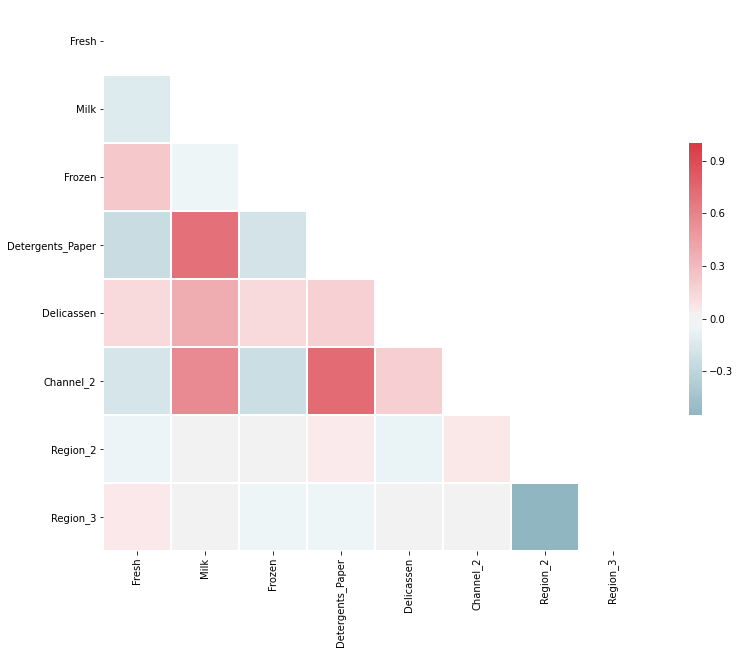

In [19]:
corr=customers_dummies.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},xticklabels=corr.columns.values,yticklabels=corr.columns.values)

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [20]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
customers_scale=scaler.fit_transform(customers_dummies)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [21]:
from sklearn import metrics
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
#Your code here:
scores = []
inertias = []
values = np.arange(2, 10)
X=customers_scale
for num_clusters in values:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=len(X))
    print('\nNumber of clusters =', num_clusters)
    print('Silhouette score =', score)
    print('Intertia for current cluster = ', kmeans.inertia_)
    scores.append(score)
    inertias.append(kmeans.inertia_)

C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)



Number of clusters = 2
Silhouette score = 0.2970274766564493
Intertia for current cluster =  2527.5198206478694

Number of clusters = 3
Silhouette score = 0.32847162503111227
Intertia for current cluster =  2091.3373951581043

Number of clusters = 4
Silhouette score = 0.3001446974091239
Intertia for current cluster =  1799.9682004457004

Number of clusters = 5
Silhouette score = 0.3033154139259612
Intertia for current cluster =  1607.1590956487335

Number of clusters = 6
Silhouette score = 0.31635368409420644
Intertia for current cluster =  1415.3241305502436

Number of clusters = 7
Silhouette score = 0.32079778733464015
Intertia for current cluster =  1286.1312327760754

Number of clusters = 8
Silhouette score = 0.3348906993594636
Intertia for current cluster =  1159.0176660089671

Number of clusters = 9
Silhouette score = 0.34891787609847447
Intertia for current cluster =  1048.828094594694


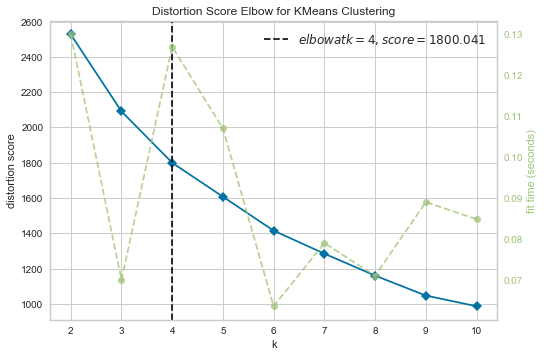

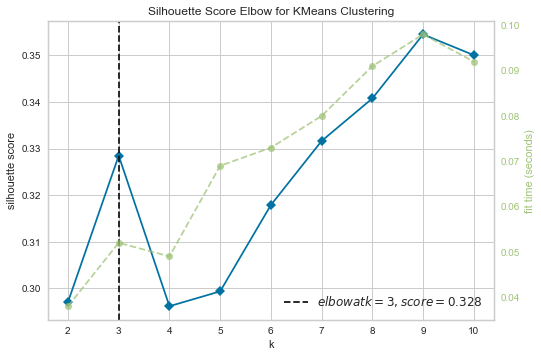

C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Usuario_Asignado\Anaconda3\envs\ironhack_conda\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


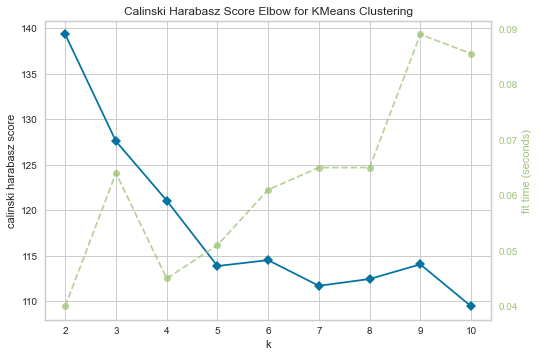

In [22]:
from yellowbrick.cluster import KElbowVisualizer
for metric in ['distortion','silhouette','calinski_harabasz']:
    model=KMeans()
    visualizer=KElbowVisualizer(model,metric=metric)
    visualizer.fit(X)
    visualizer.poof()

In [23]:
from sklearn.metrics import silhouette_score
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
print(f'Model 1 Silhouette Score: {format(silhouette_score(X, kmeans.labels_))}')

Model 1 Silhouette Score: 0.32847162503111244


Count the values in `labels`.

In [24]:
customers_clean['labels']=kmeans.labels_
customers_clean.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  
0        1338       2  
1        1776       2  
2        7844       2  
3        1788       0  
4        5185       2

In [25]:
customers_clean.labels.value_counts()

0    258
2    119
1     44
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [26]:
from sklearn.cluster import DBSCAN

In [27]:
dbscan=DBSCAN(.5)
dbscan.fit(X)
print(f'Model 1 Silhouette Score: {format(silhouette_score(X, dbscan.labels_))}')

Model 1 Silhouette Score: -0.1282488112872952


Count the values in `labels_DBSCAN`.

In [28]:
customers_clean['labels_DBSCAN']=dbscan.labels_
customers_clean.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  labels_DBSCAN  
0        1338       2             -1  
1        1776       2             -1  
2        7844       2             -1  
3        1788       0             -1  
4        5185       2             -1

In [29]:
customers_clean.labels_DBSCAN.value_counts()

-1    322
 0     84
 1      9
 2      6
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [30]:
customers_clean.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  labels_DBSCAN  
0        1338       2             -1  
1        1776       2             -1  
2        7844       2             -1  
3        1788       0             -1  
4        5185       2             -1

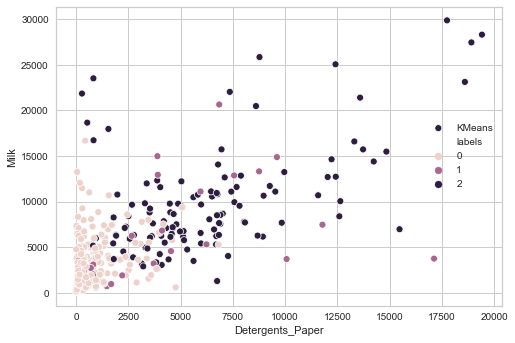

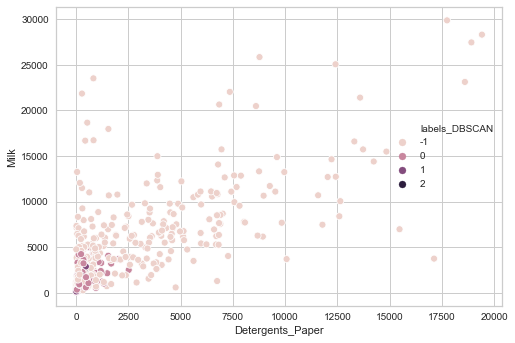

In [40]:
sns.scatterplot(x='Detergents_Paper',y='Milk',hue='labels',data=customers_clean,label='KMeans')
plt.show()
sns.scatterplot(x='Detergents_Paper',y='Milk',hue='labels_DBSCAN',data=customers_clean);

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

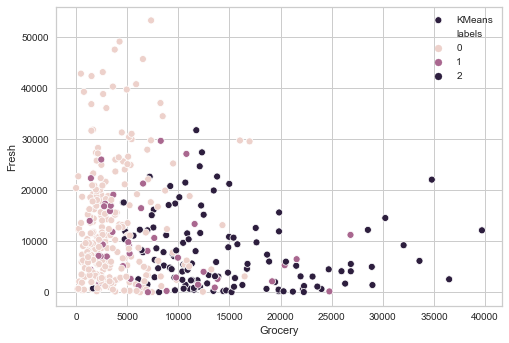

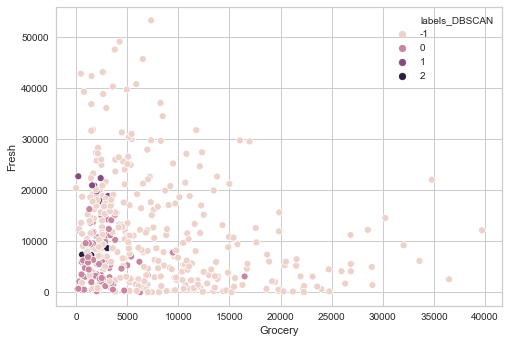

In [41]:
sns.scatterplot(x='Grocery',y='Fresh',hue='labels',data=customers_clean,label='KMeans')
plt.show()
sns.scatterplot(x='Grocery',y='Fresh',hue='labels_DBSCAN',data=customers_clean);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

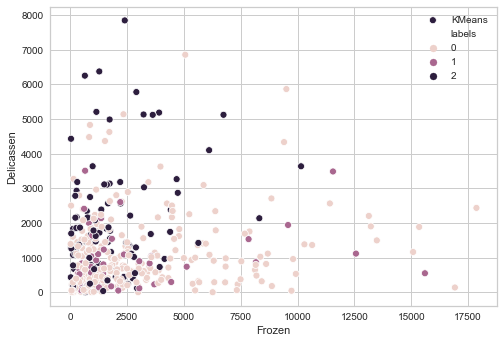

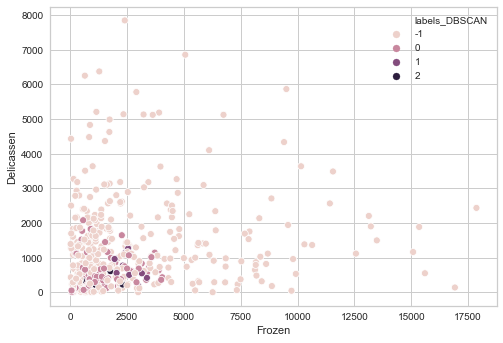

In [42]:
sns.scatterplot(x='Frozen',y='Delicassen',hue='labels',data=customers_clean,label='KMeans')
plt.show()
sns.scatterplot(x='Frozen',y='Delicassen',hue='labels_DBSCAN',data=customers_clean);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [43]:
customers_clean.groupby('labels').mean()

Channel    Region         Fresh         Milk       Grocery  \
labels                                                                
0       1.019380  2.573643  12436.058140  2995.914729   3563.306202   
1       1.386364  2.000000   9401.818182  4370.659091   7606.931818   
2       1.949580  2.655462   7602.974790  9974.453782  14702.613445   

             Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                             
0       2978.313953        758.248062  1067.418605      -0.534884  
1       2909.181818       2762.022727  1046.750000      -1.000000  
2       1660.806723       6346.764706  1760.033613      -1.000000

In [44]:
customers_clean.groupby('labels_DBSCAN').mean()

Channel    Region         Fresh         Milk      Grocery  \
labels_DBSCAN                                                               
-1             1.419255  2.431677  11767.267081  6150.987578  8577.937888   
 0             1.000000  3.000000   6086.916667  1803.059524  2530.666667   
 1             1.000000  3.000000  19819.555556  1410.888889  2111.888889   
 2             1.000000  1.000000   8033.333333  1240.333333  1661.666667   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             2932.307453       3191.953416  1460.357143  0.875776  
 0             1416.952381        477.642857   618.714286  0.000000  
 1             2603.888889        312.666667   705.111111  0.000000  
 2             1230.500000        279.500000   390.333333  0.000000

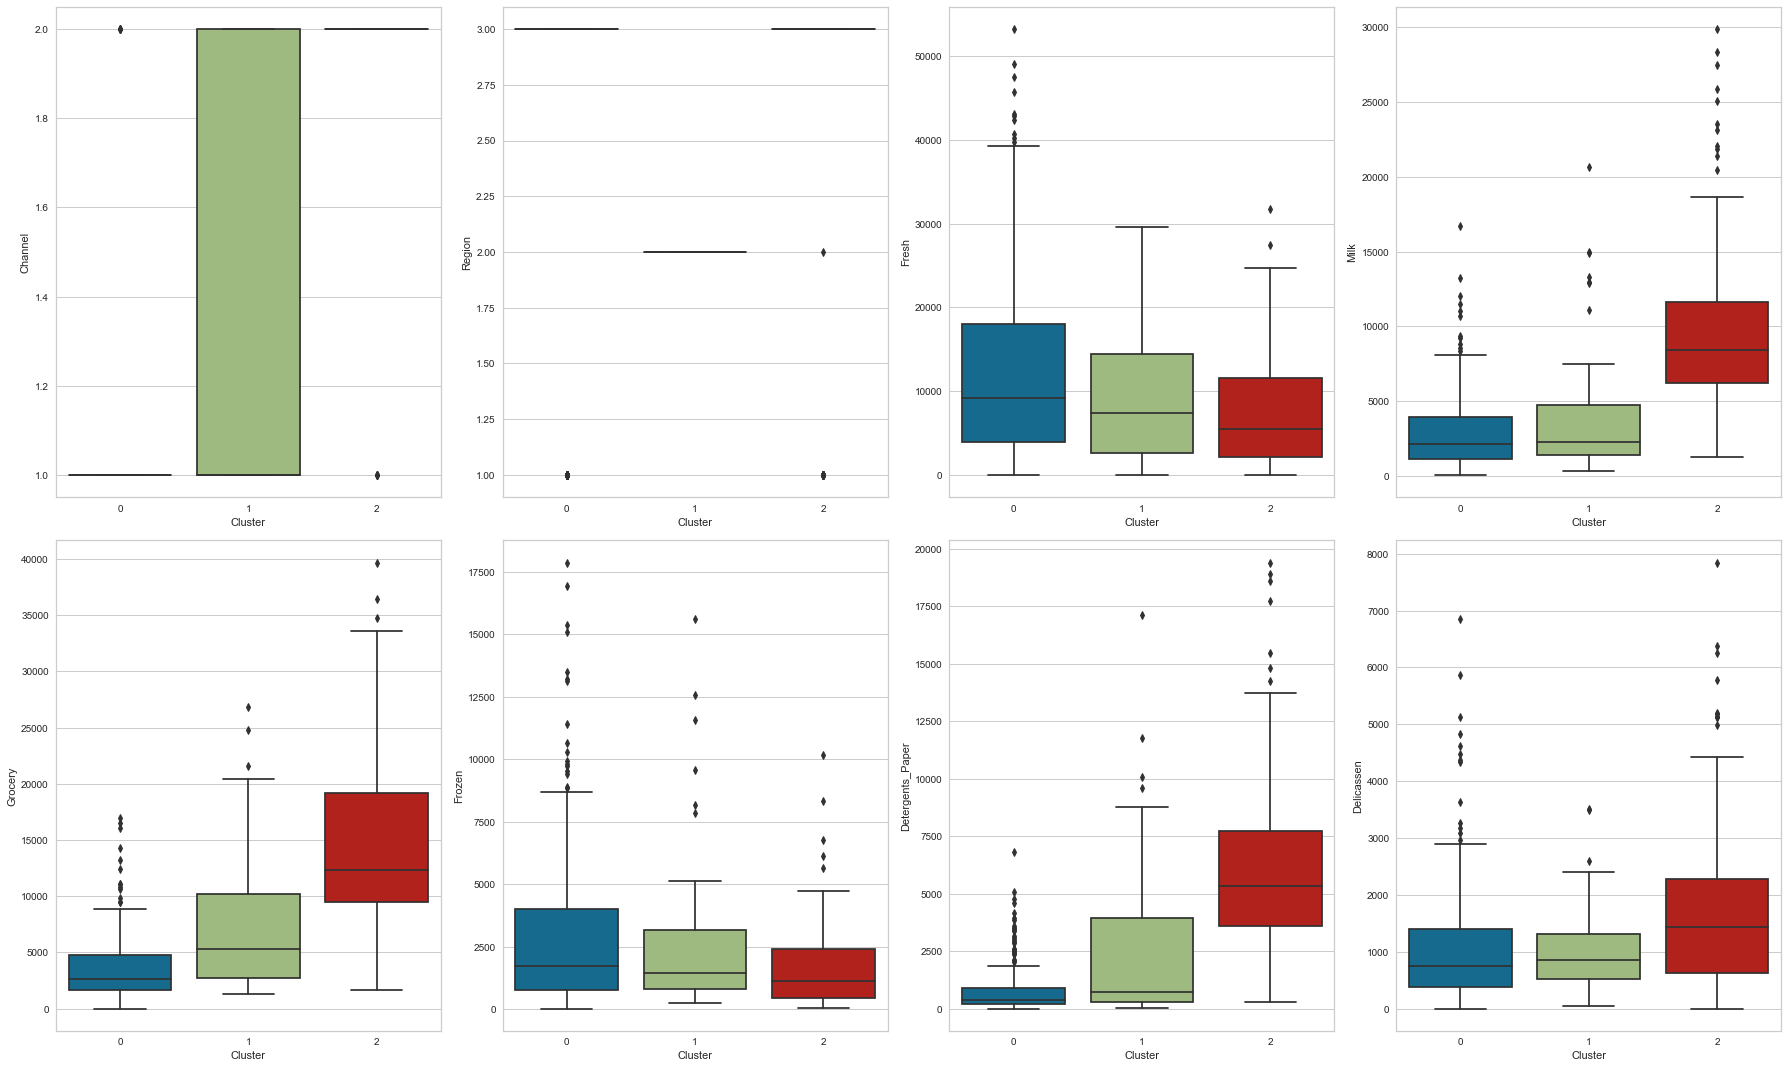

In [48]:
fig, axes = plt.subplots(2,4, figsize=(25,15))
for i,ax in enumerate(axes.flat):
    sns.boxplot(x='labels', y=customers_clean.columns[i], data=customers_clean,ax=ax)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(customers_clean.columns[i])
plt.tight_layout()

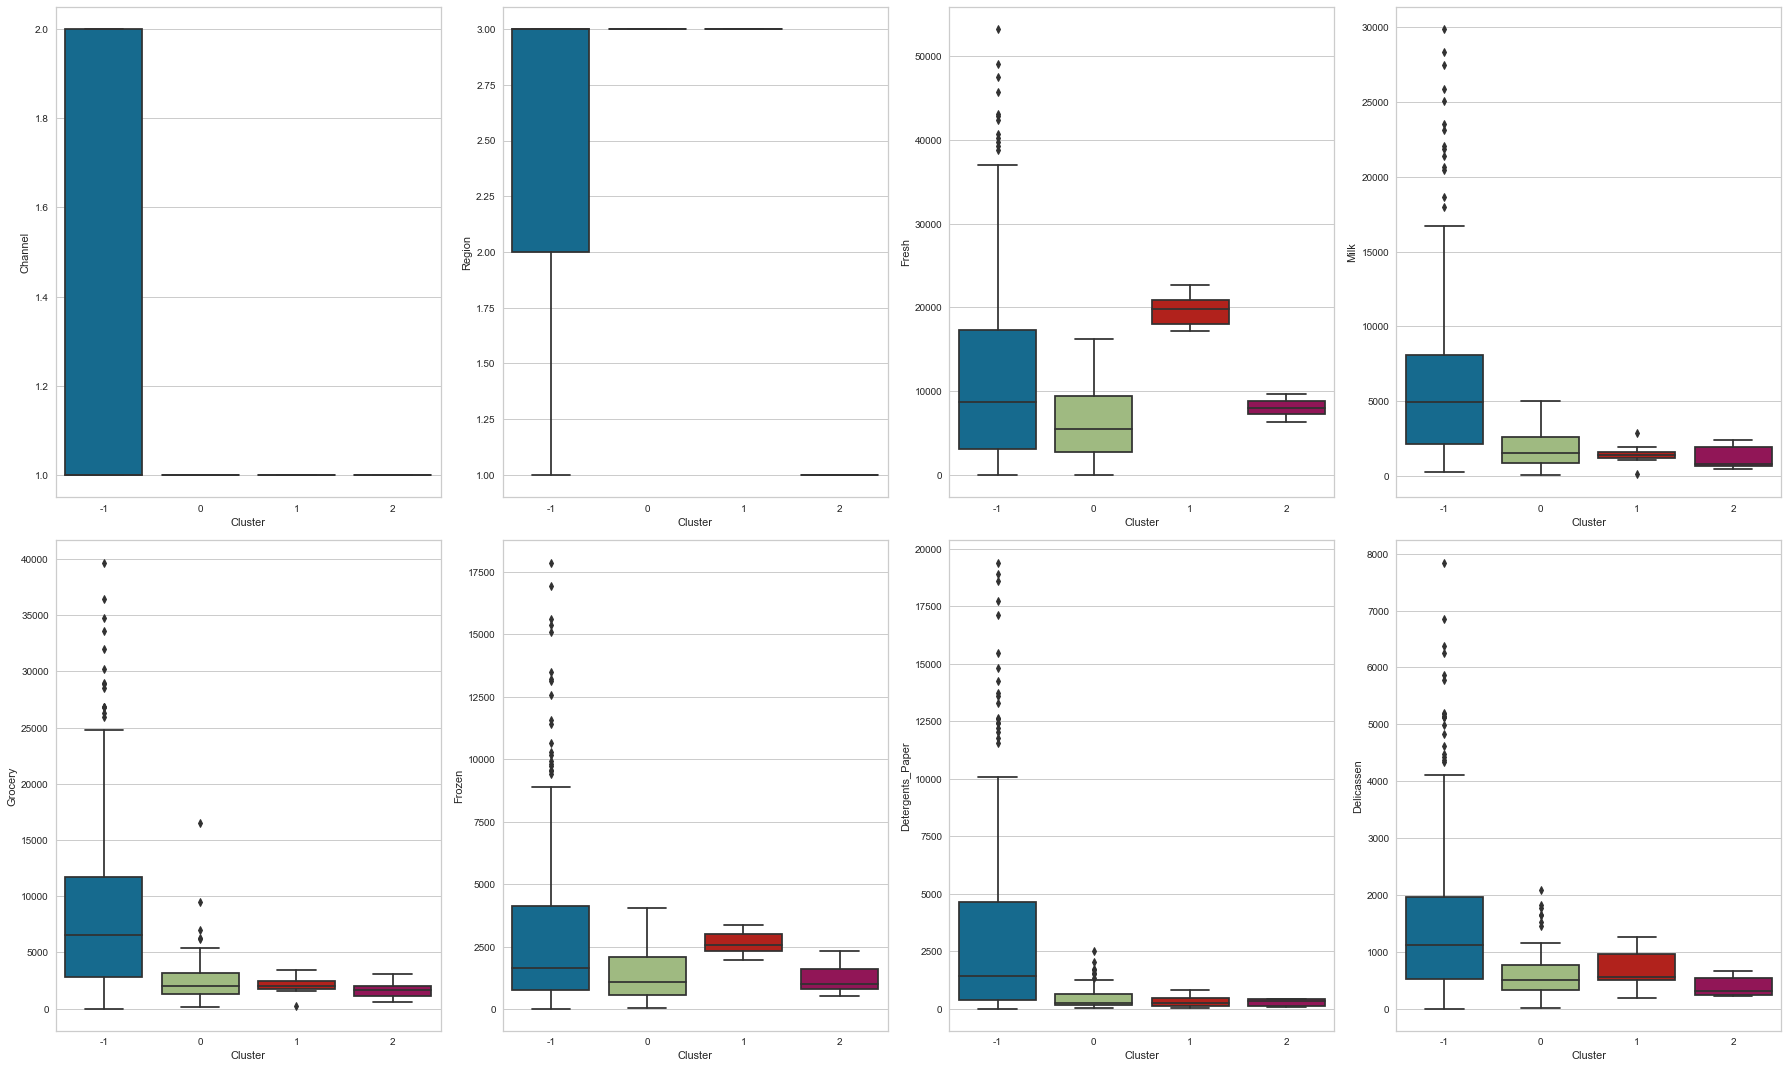

In [49]:
fig, axes = plt.subplots(2,4, figsize=(25,15))
for i,ax in enumerate(axes.flat):
    sns.boxplot(x='labels_DBSCAN', y=customers_clean.columns[i], data=customers_clean,ax=ax)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(customers_clean.columns[i])
plt.tight_layout()

Which algorithm appears to perform better?

In [52]:
# idk Kmeans?

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

Clusters= 4 Silhouette Score: 0.30014469740912386


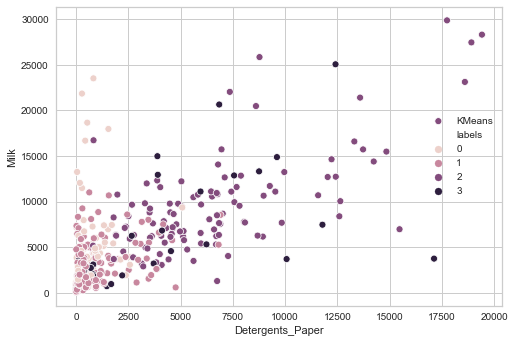

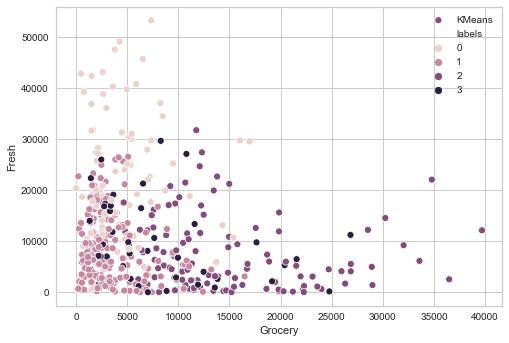

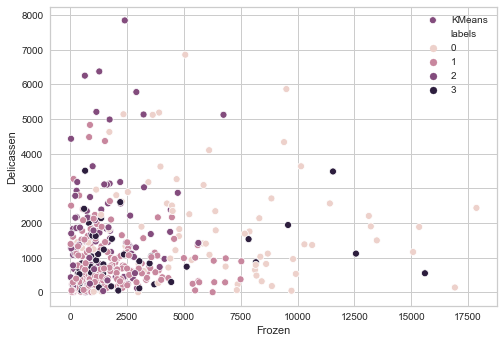

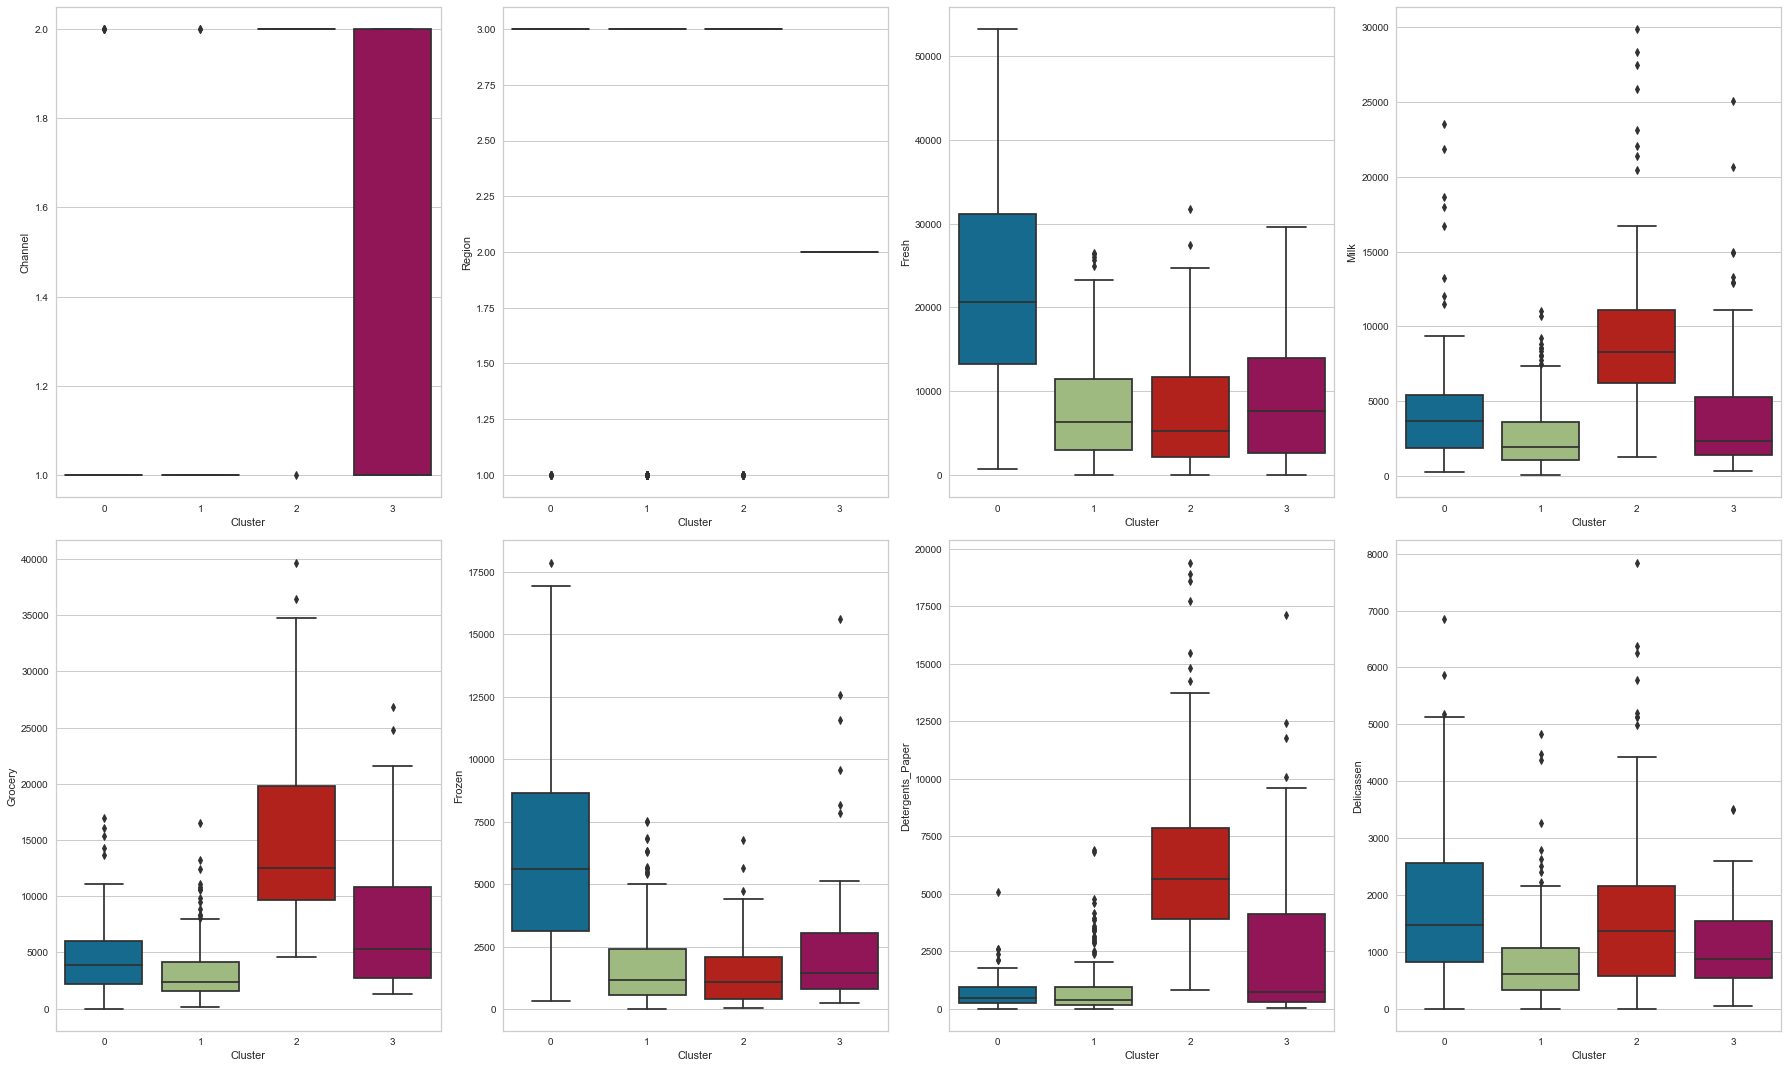

         Channel    Region         Fresh         Milk       Grocery  \
labels                                                                
0       1.065789  2.657895  23243.078947  4929.276316   4744.723684   
1       1.010582  2.523810   7958.412698  2646.952381   3267.576720   
2       1.990991  2.693694   7503.459459  9548.972973  15073.225225   
3       1.400000  2.000000   9409.755556  4830.666667   7830.000000   

             Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                             
0       6217.907895        735.486842  1890.934211      -1.000000  
1       1762.502646        807.222222   821.597884      -0.365079  
2       1434.585586       6576.783784  1659.639640      -1.000000  
3       2869.600000       2976.377778  1059.600000      -1.000000  
Clusters= 5 Silhouette Score: 0.2963426154633707


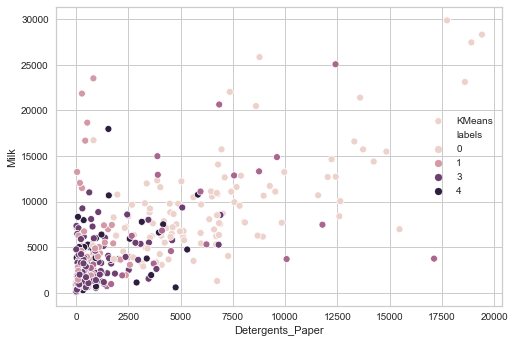

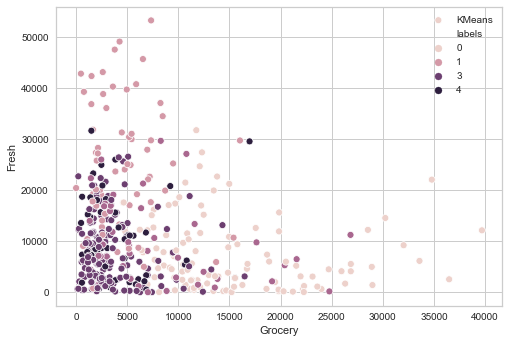

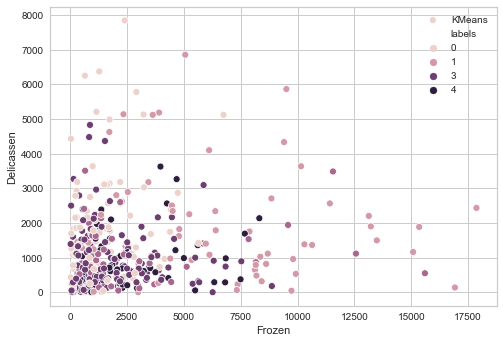

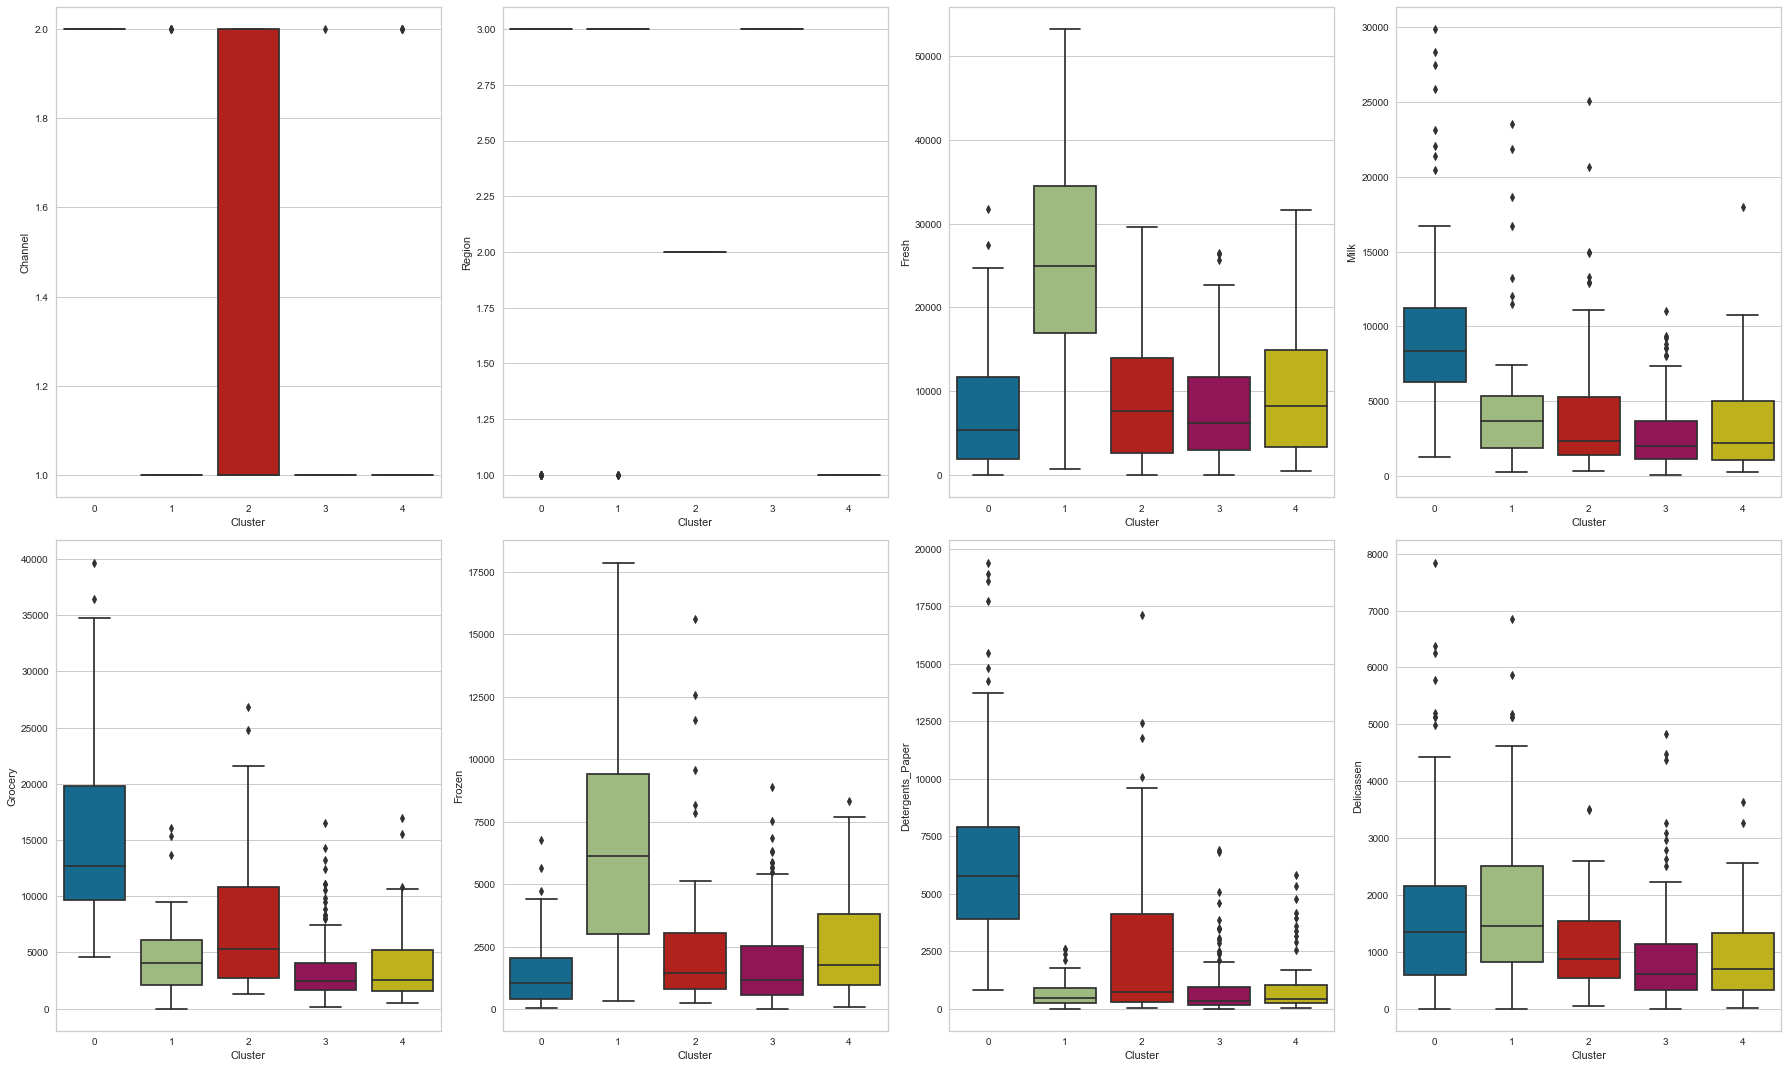

         Channel    Region         Fresh         Milk       Grocery  \
labels                                                                
0       2.000000  2.740741   7469.953704  9615.861111  15206.379630   
1       1.065574  2.836066  25277.967213  4895.721311   4599.032787   
2       1.400000  2.000000   9409.755556  4830.666667   7830.000000   
3       1.006623  3.000000   7927.033113  2702.344371   3398.092715   
4       1.071429  1.000000   9960.803571  3386.232143   3845.660714   

             Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                             
0       1418.148148       6632.509259  1668.138889      -1.000000  
1       6545.737705        672.983607  1904.983607      -1.000000  
2       2869.600000       2976.377778  1059.600000      -1.000000  
3       1783.728477        795.754967   883.245033      -0.324503  
4       2555.714286       1088.625000   955.000000      -0.678571  
Clusters= 6 Silhouette Sco

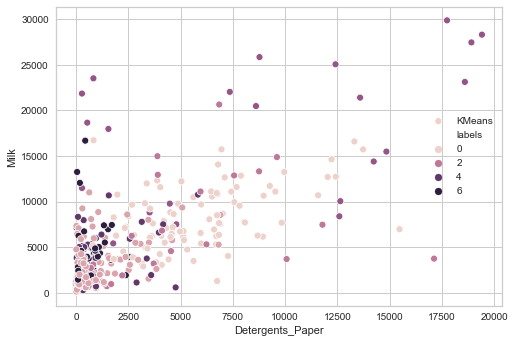

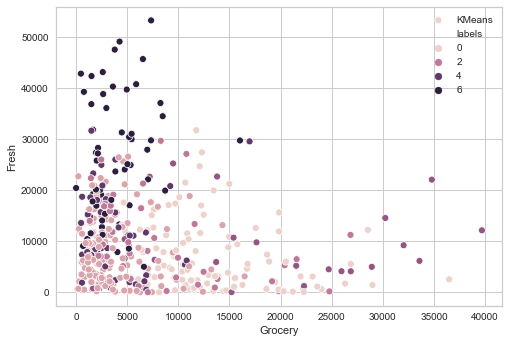

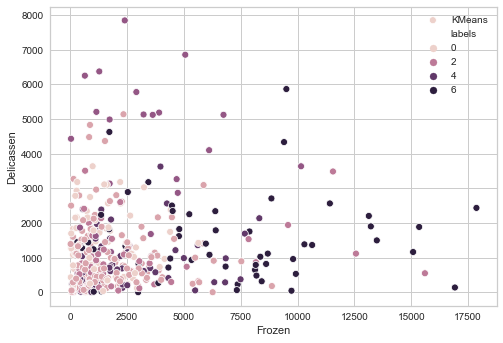

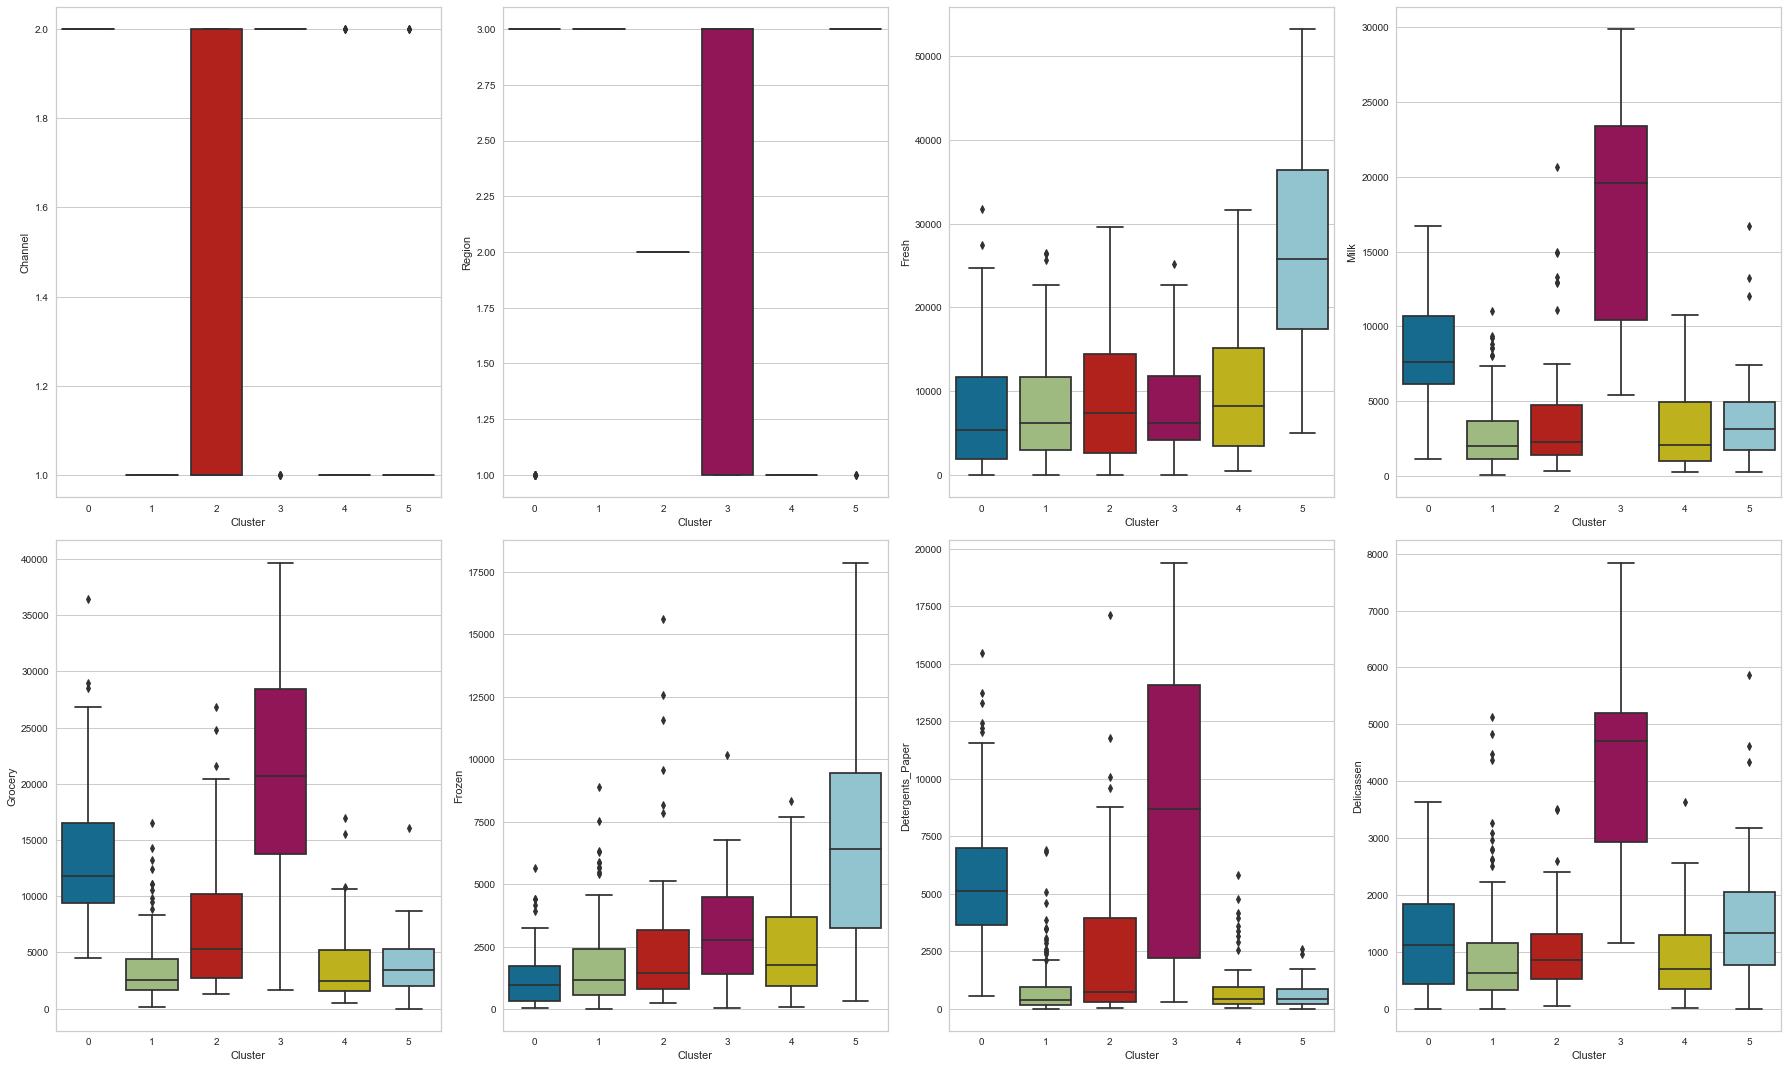

         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       2.000000  2.768421   7422.631579   8119.431579  13429.242105   
1       1.000000  3.000000   7945.264901   2726.026490   3464.092715   
2       1.386364  2.000000   9401.818182   4370.659091   7606.931818   
3       1.772727  2.318182   9209.045455  18046.227273  20316.500000   
4       1.055556  1.000000  10090.462963   3091.111111   3787.407407   
5       1.054545  2.890909  26561.600000   3872.600000   3974.636364   

             Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                             
0       1289.210526       5706.452632  1237.915789      -1.000000  
1       1744.516556        823.112583   940.198675      -0.324503  
2       2909.181818       2762.022727  1046.750000      -1.000000  
3       3170.409091       8987.590909  4225.409091      -1.000000  
4       2509.03

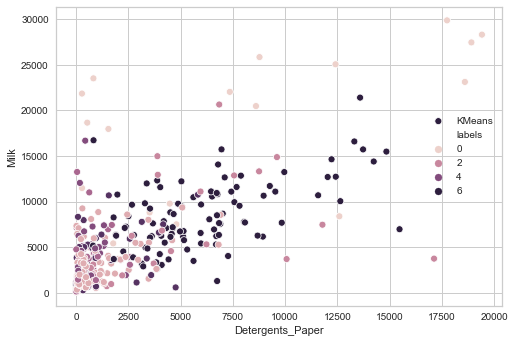

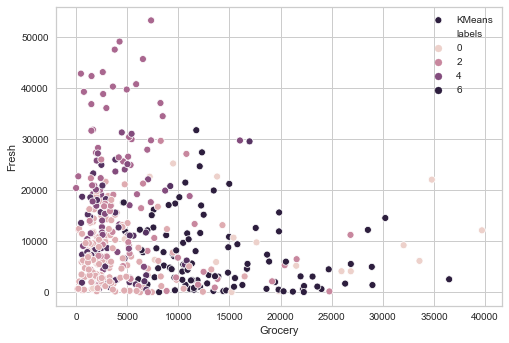

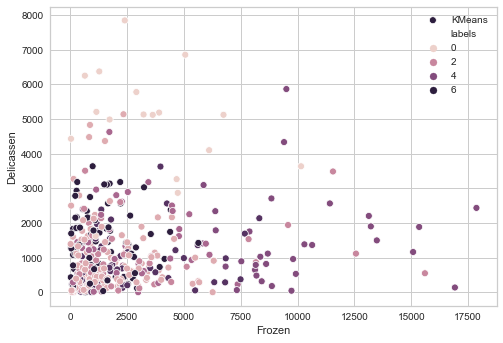

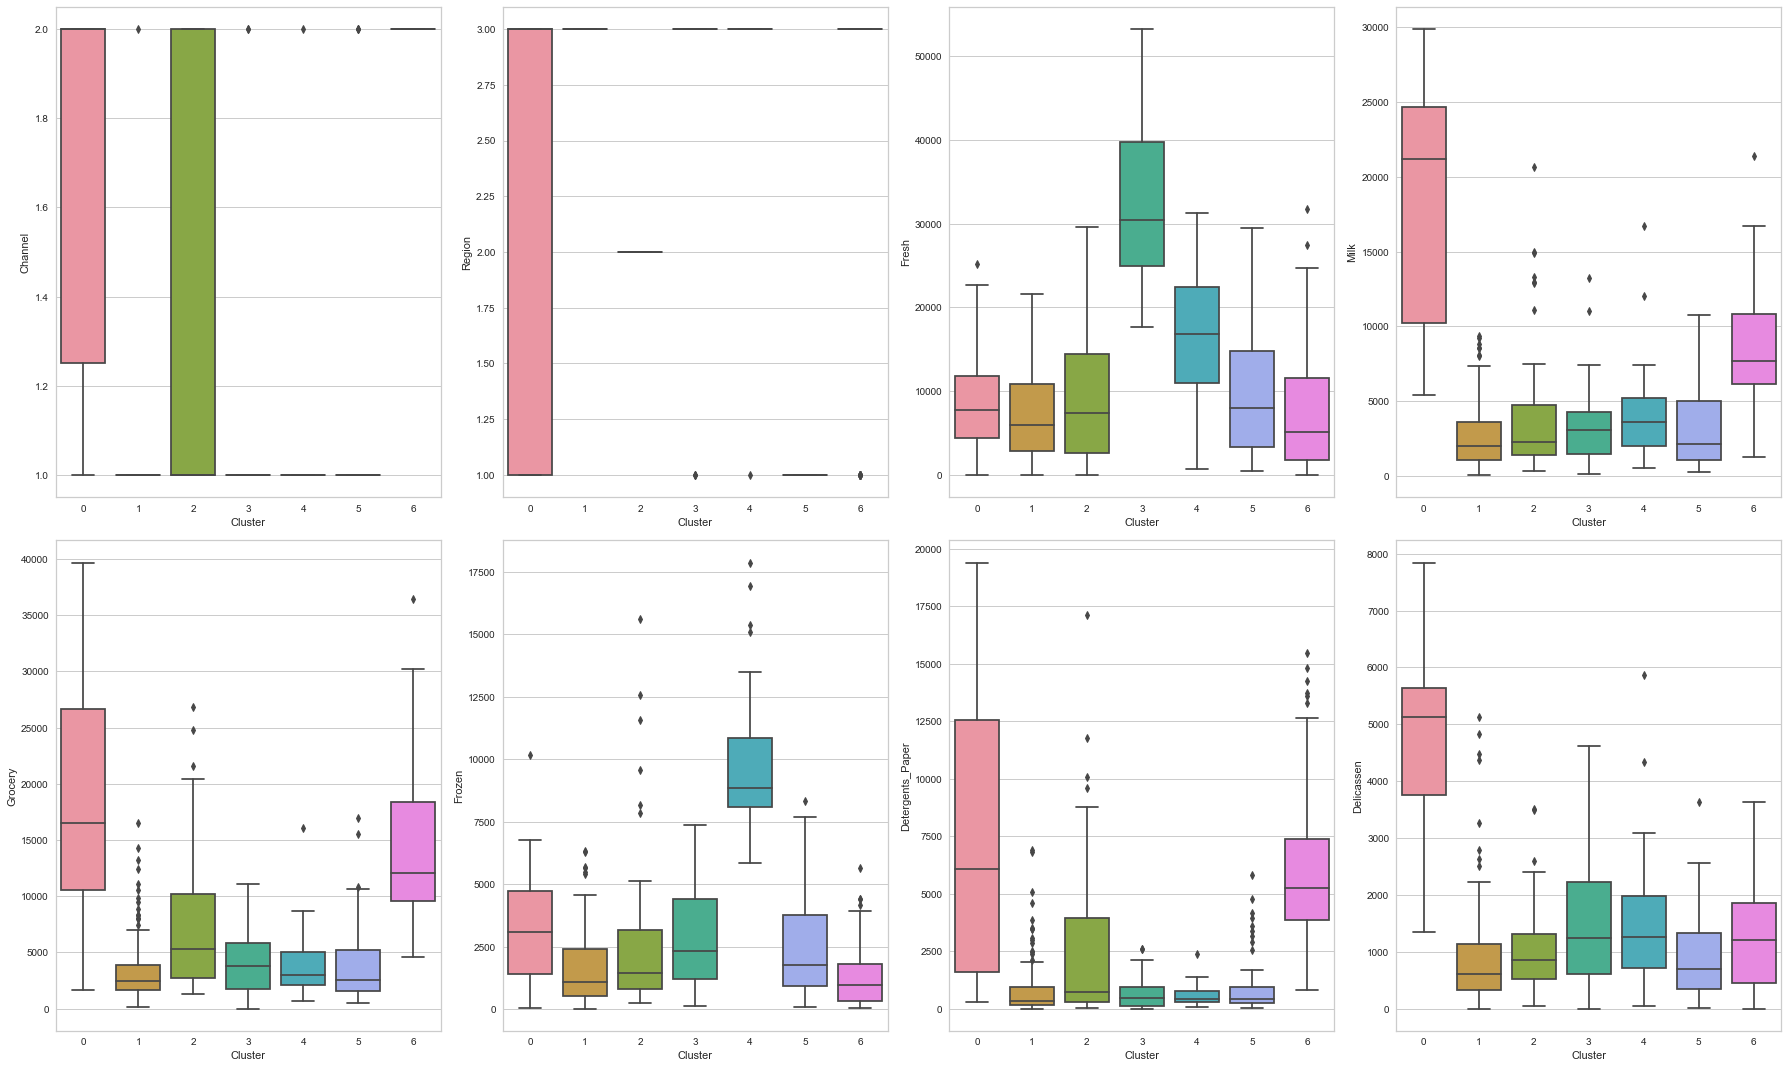

         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.722222  2.277778   9855.944444  18648.555556  18933.166667   
1       1.007194  3.000000   7127.381295   2634.273381   3389.215827   
2       1.386364  2.000000   9401.818182   4370.659091   7606.931818   
3       1.054054  2.837838  32159.945946   3360.756757   4042.378378   
4       1.031250  2.937500  16398.718750   4241.375000   3969.750000   
5       1.056604  1.000000   9684.358491   3140.207547   3830.660377   
6       2.000000  2.755102   7318.326531   8485.357143  14055.316327   

             Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                             
0       3456.888889       7912.777778  4728.388889      -1.000000  
1       1618.194245        825.115108   895.949640      -0.323741  
2       2909.181818       2762.022727  1046.750000      -1.000000  
3       275

In [58]:
for i in range(4,8):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    print(f'Clusters= {i} Silhouette Score: {format(silhouette_score(X, kmeans.labels_))}')
    customers_clean['labels']=kmeans.labels_
    sns.scatterplot(x='Detergents_Paper',y='Milk',hue='labels',data=customers_clean,label='KMeans')
    plt.show()
    sns.scatterplot(x='Grocery',y='Fresh',hue='labels',data=customers_clean,label='KMeans')
    plt.show()
    sns.scatterplot(x='Frozen',y='Delicassen',hue='labels',data=customers_clean,label='KMeans')
    plt.show()
    fig, axes = plt.subplots(2,4, figsize=(25,15))
    for i,ax in enumerate(axes.flat):
        sns.boxplot(x='labels', y=customers_clean.columns[i], data=customers_clean,ax=ax)
        ax.set_xlabel('Cluster')
        ax.set_ylabel(customers_clean.columns[i])
    plt.tight_layout()
    plt.show()
    print(customers_clean.groupby('labels').mean())

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

Model eps=1.0, min=4 Silhouette Score: 0.17434418221875006


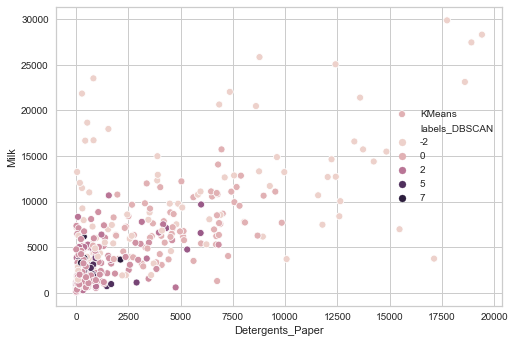

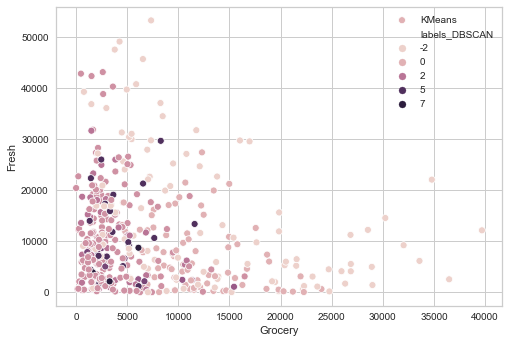

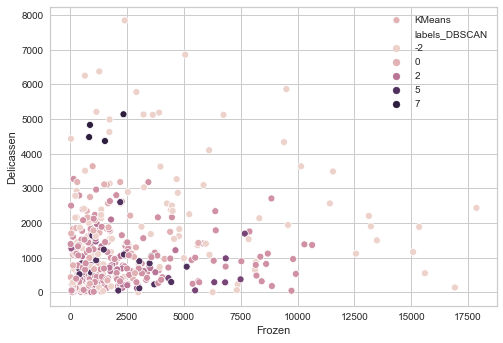

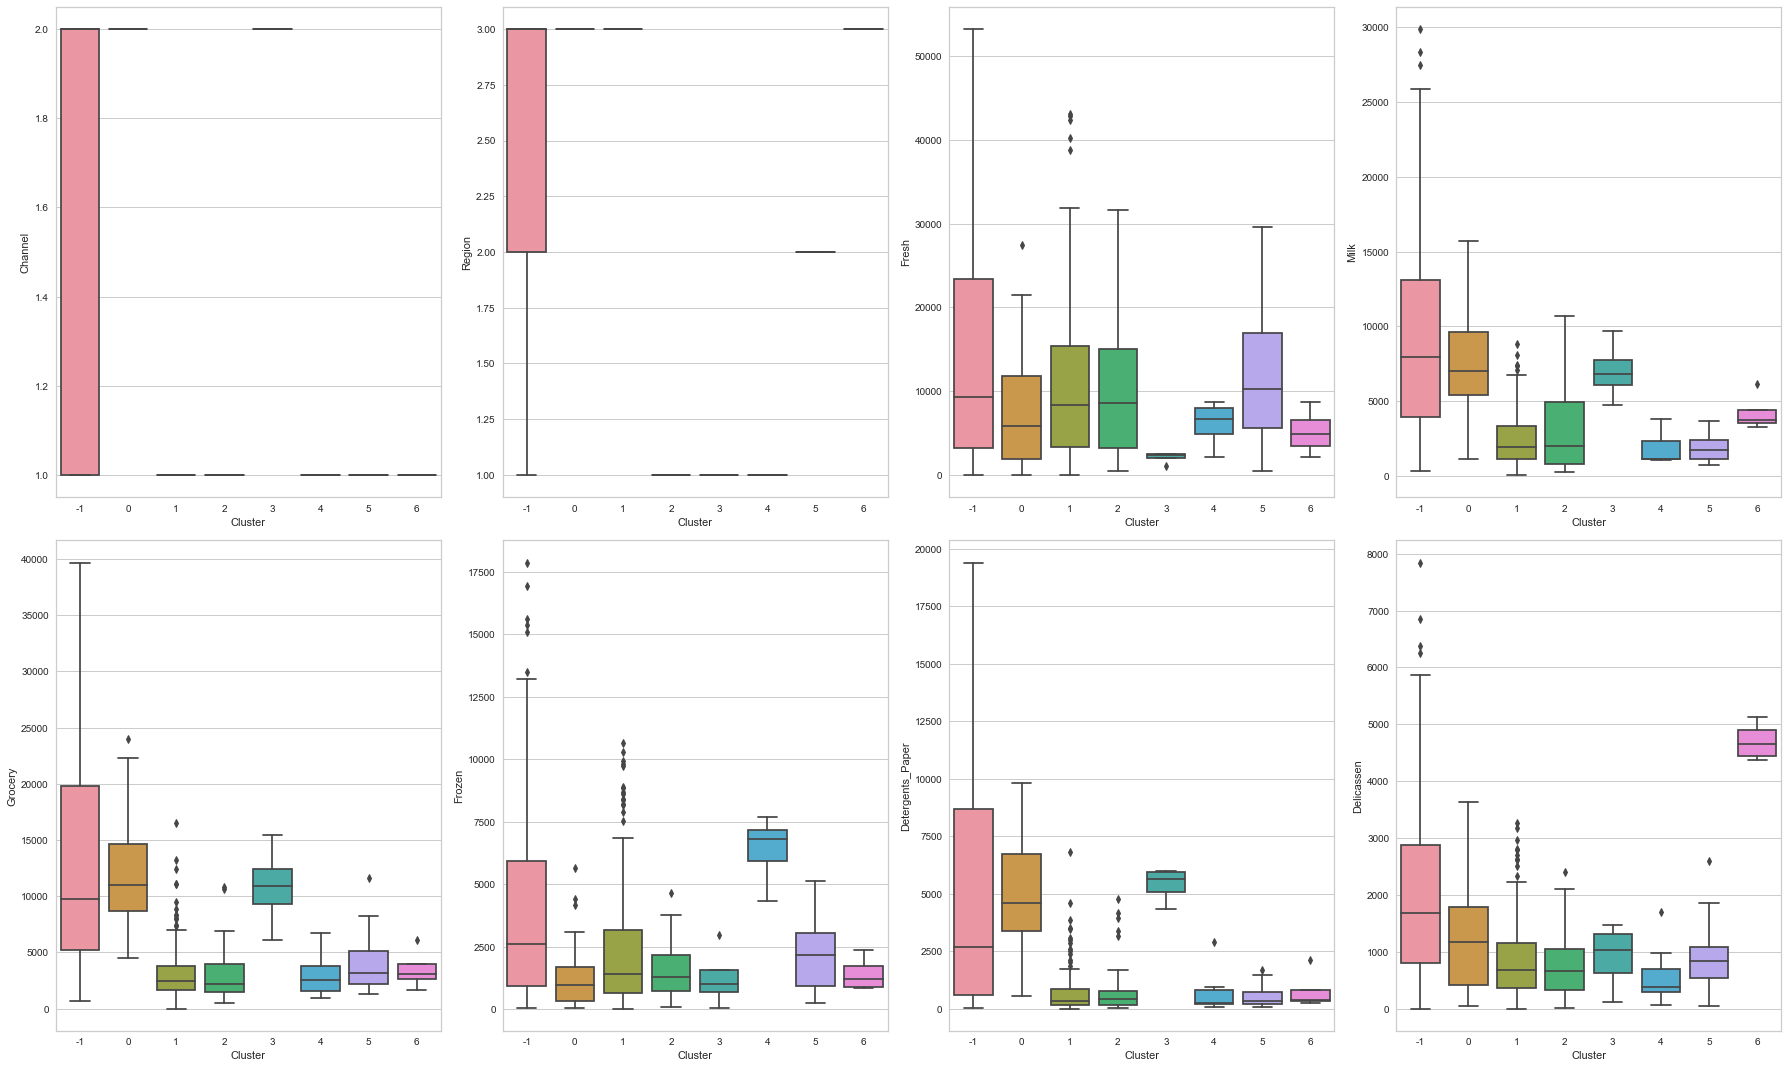

                Channel    Region         Fresh         Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.553398  2.291262  14335.252427  9580.368932  12758.961165   
 0             2.000000  3.000000   7521.243243  7369.864865  11757.094595   
 1             1.000000  3.000000  10561.541667  2416.994048   3154.077381   
 2             1.000000  1.000000   9996.076923  2952.000000   3146.461538   
 3             2.000000  1.000000   2100.750000  7016.000000  10822.250000   
 4             1.000000  1.000000   6155.857143  1824.714286   2988.571429   
 5             1.000000  2.000000  11707.272727  1871.181818   4031.363636   
 6             1.000000  3.000000   5148.500000  4220.250000   3488.750000   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             4227.572816       5036.660194  2127.262136  3.058252  
 0       

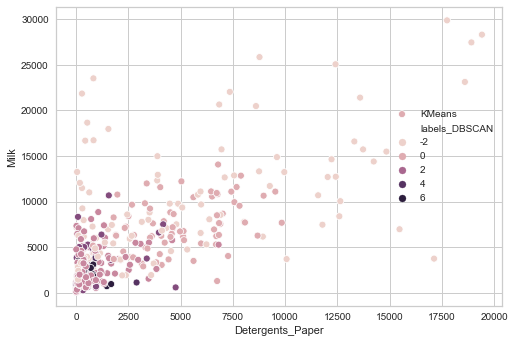

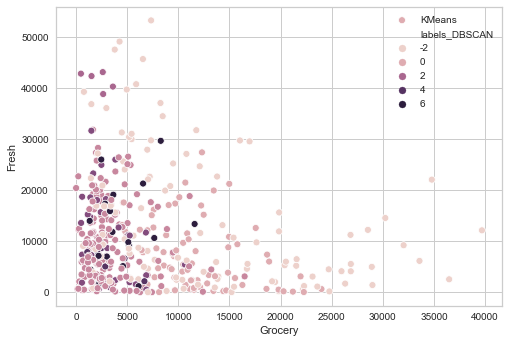

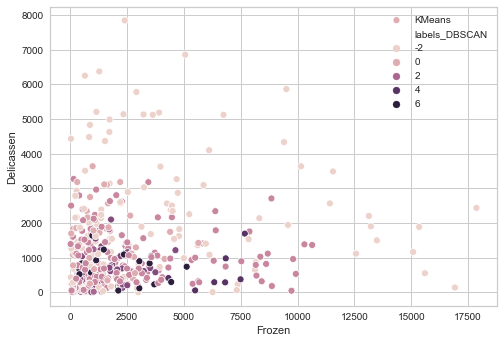

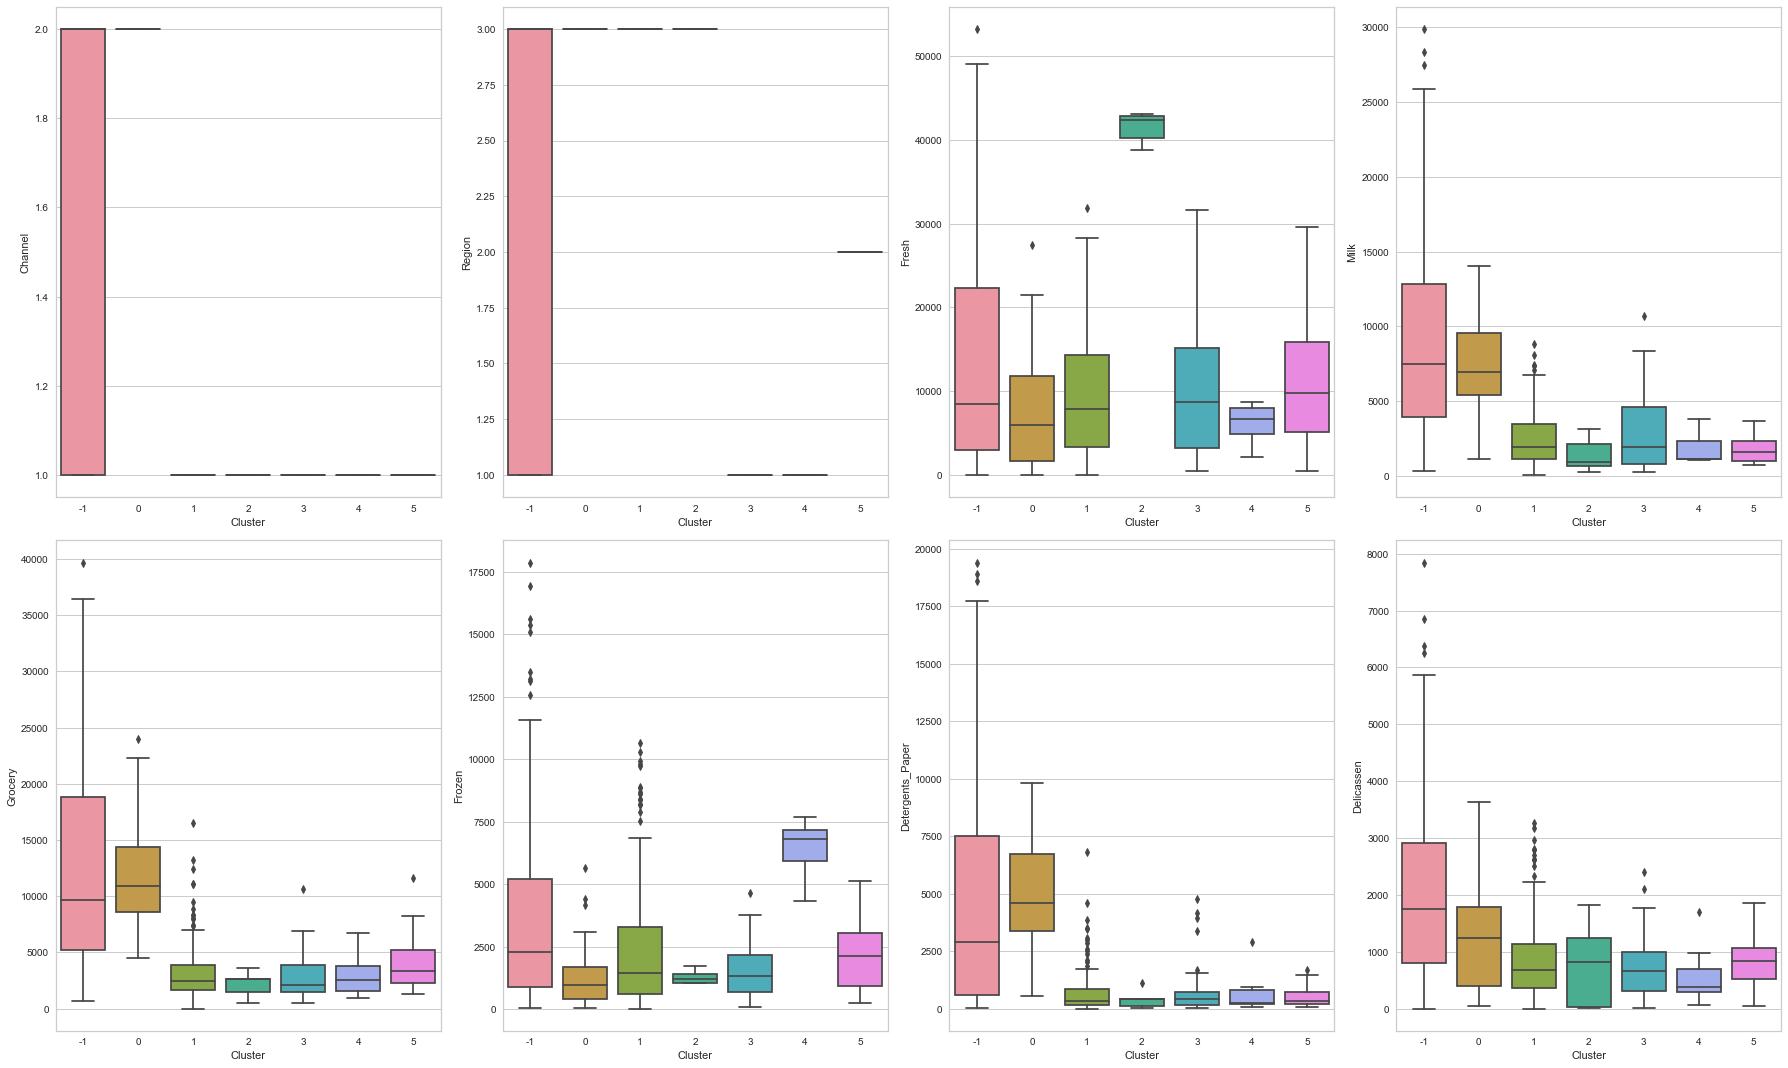

               Channel    Region         Fresh         Milk       Grocery  \
labels_DBSCAN                                                               
-1             1.54386  2.263158  13496.859649  9284.587719  12284.122807   
 0             2.00000  3.000000   7561.383562  7255.356164  11689.260274   
 1             1.00000  3.000000   9614.147239  2447.539877   3184.337423   
 2             1.00000  3.000000  41446.600000  1421.200000   2167.600000   
 3             1.00000  1.000000  10095.921053  2825.078947   2944.605263   
 4             1.00000  1.000000   6155.857143  1824.714286   2988.571429   
 5             1.00000  2.000000  11201.857143  1807.142857   4154.428571   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             3943.070175       4857.412281  2162.859649  3.122807  
 0             1261.301370       4911.054795  1232.438356  5.931507  
 1             2444.779141

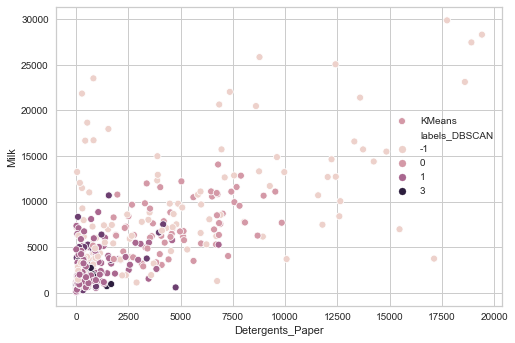

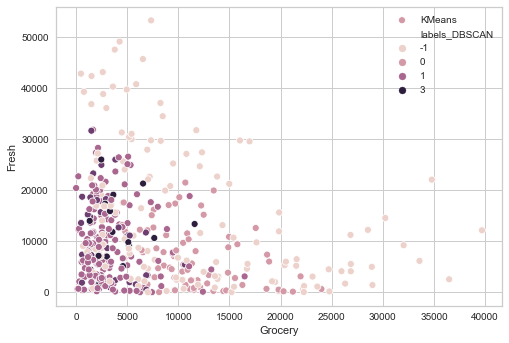

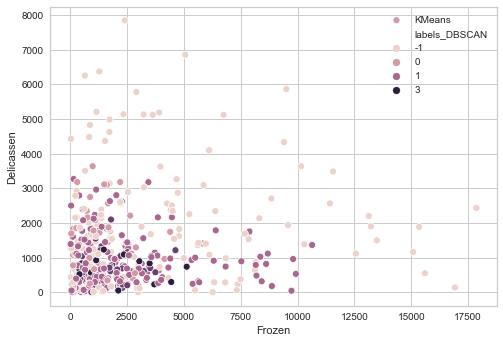

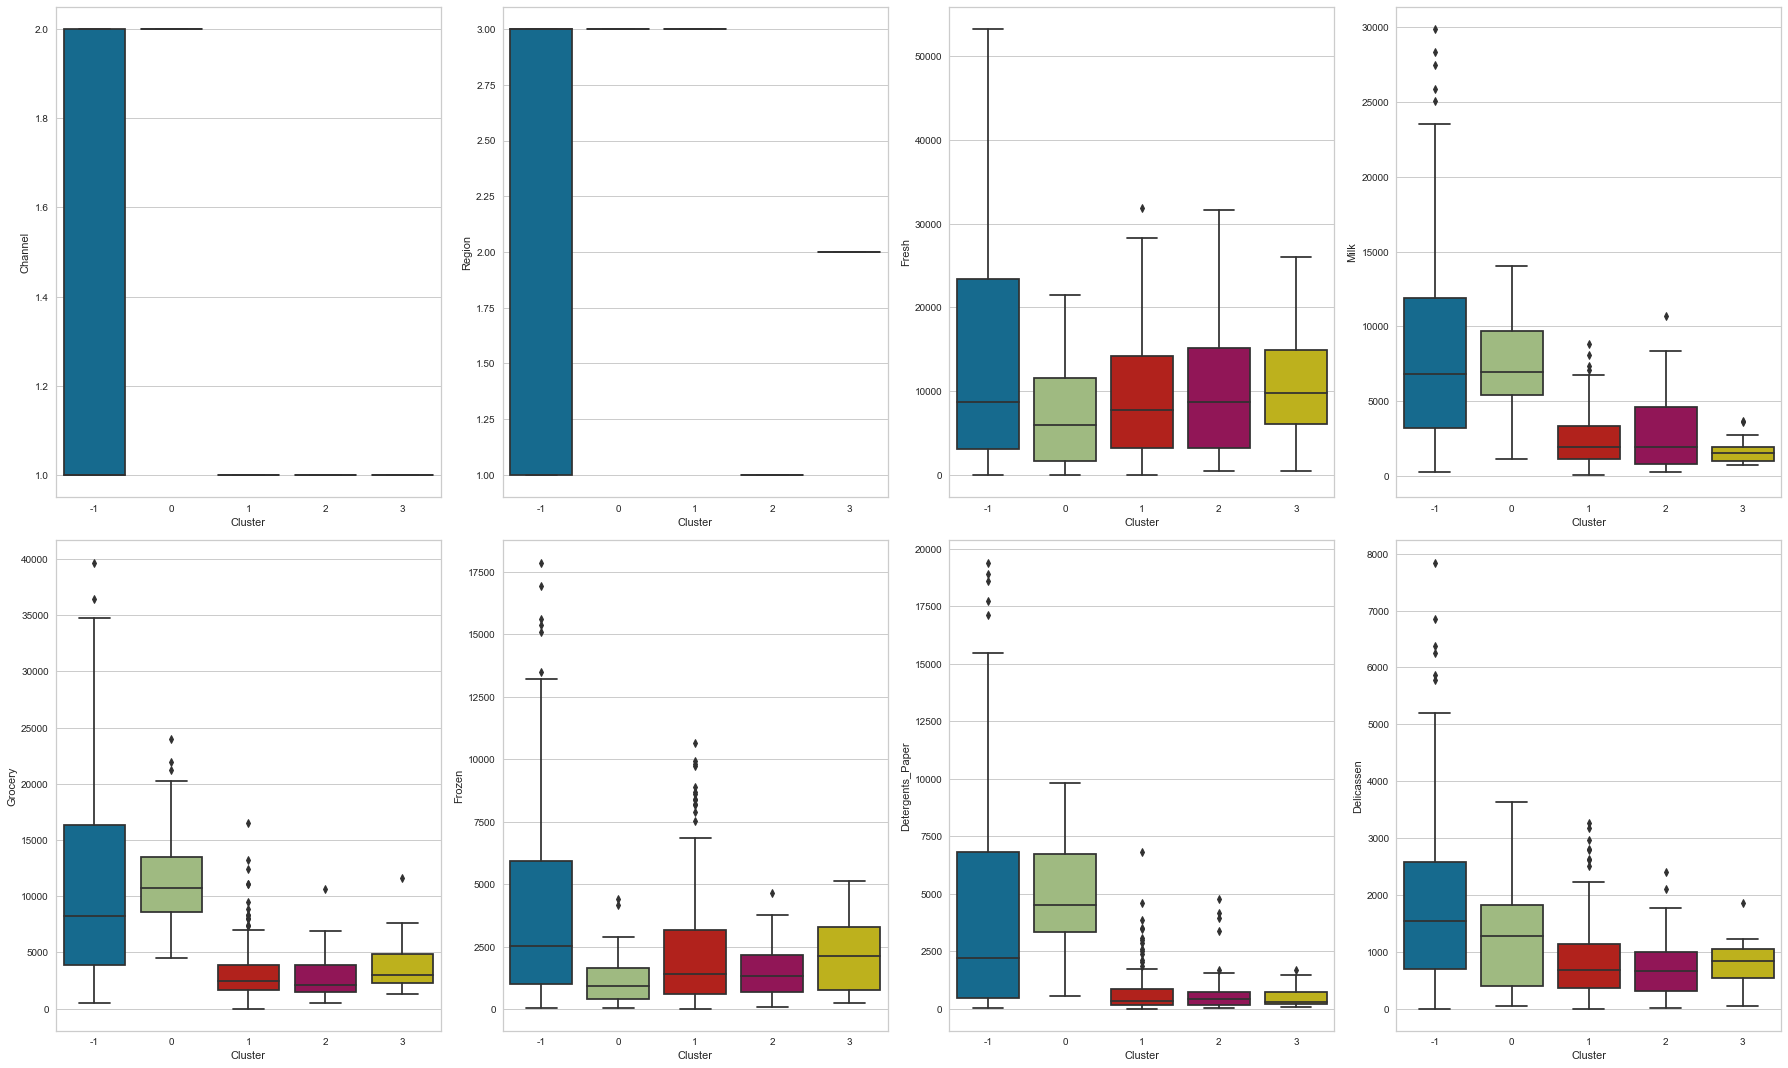

                Channel    Region         Fresh         Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.488889  2.259259  14299.296296  8302.355556  11234.985185   
 0             2.000000  3.000000   7249.434783  7338.318841  11451.666667   
 1             1.000000  3.000000   9426.587500  2407.331250   3200.106250   
 2             1.000000  1.000000  10095.921053  2825.078947   2944.605263   
 3             1.000000  2.000000  10759.052632  1711.947368   3834.157895   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             4015.896296       4348.903704  1969.851852  3.303704  
 0             1165.115942       4866.173913  1258.086957  5.927536  
 1             2330.981250        685.200000   844.643750  1.487500  
 2             1541.105263        804.921053   737.500000  4.947368  
 3             2104.578947       

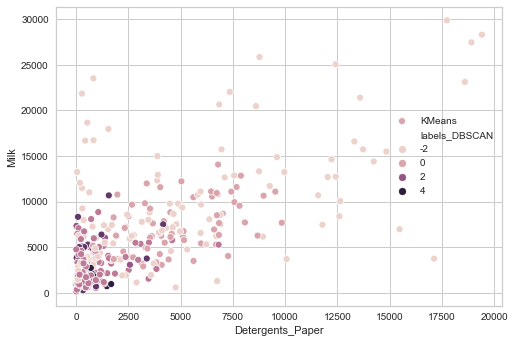

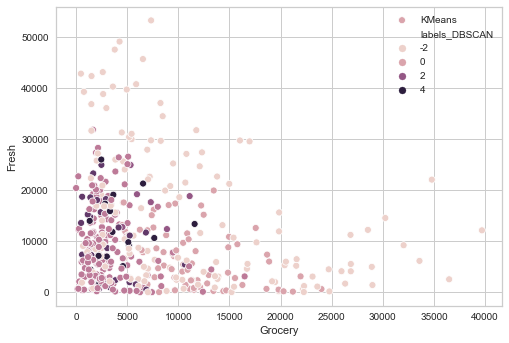

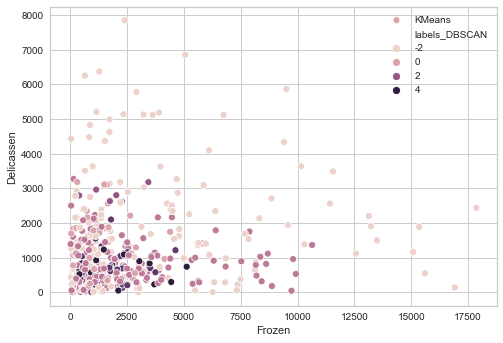

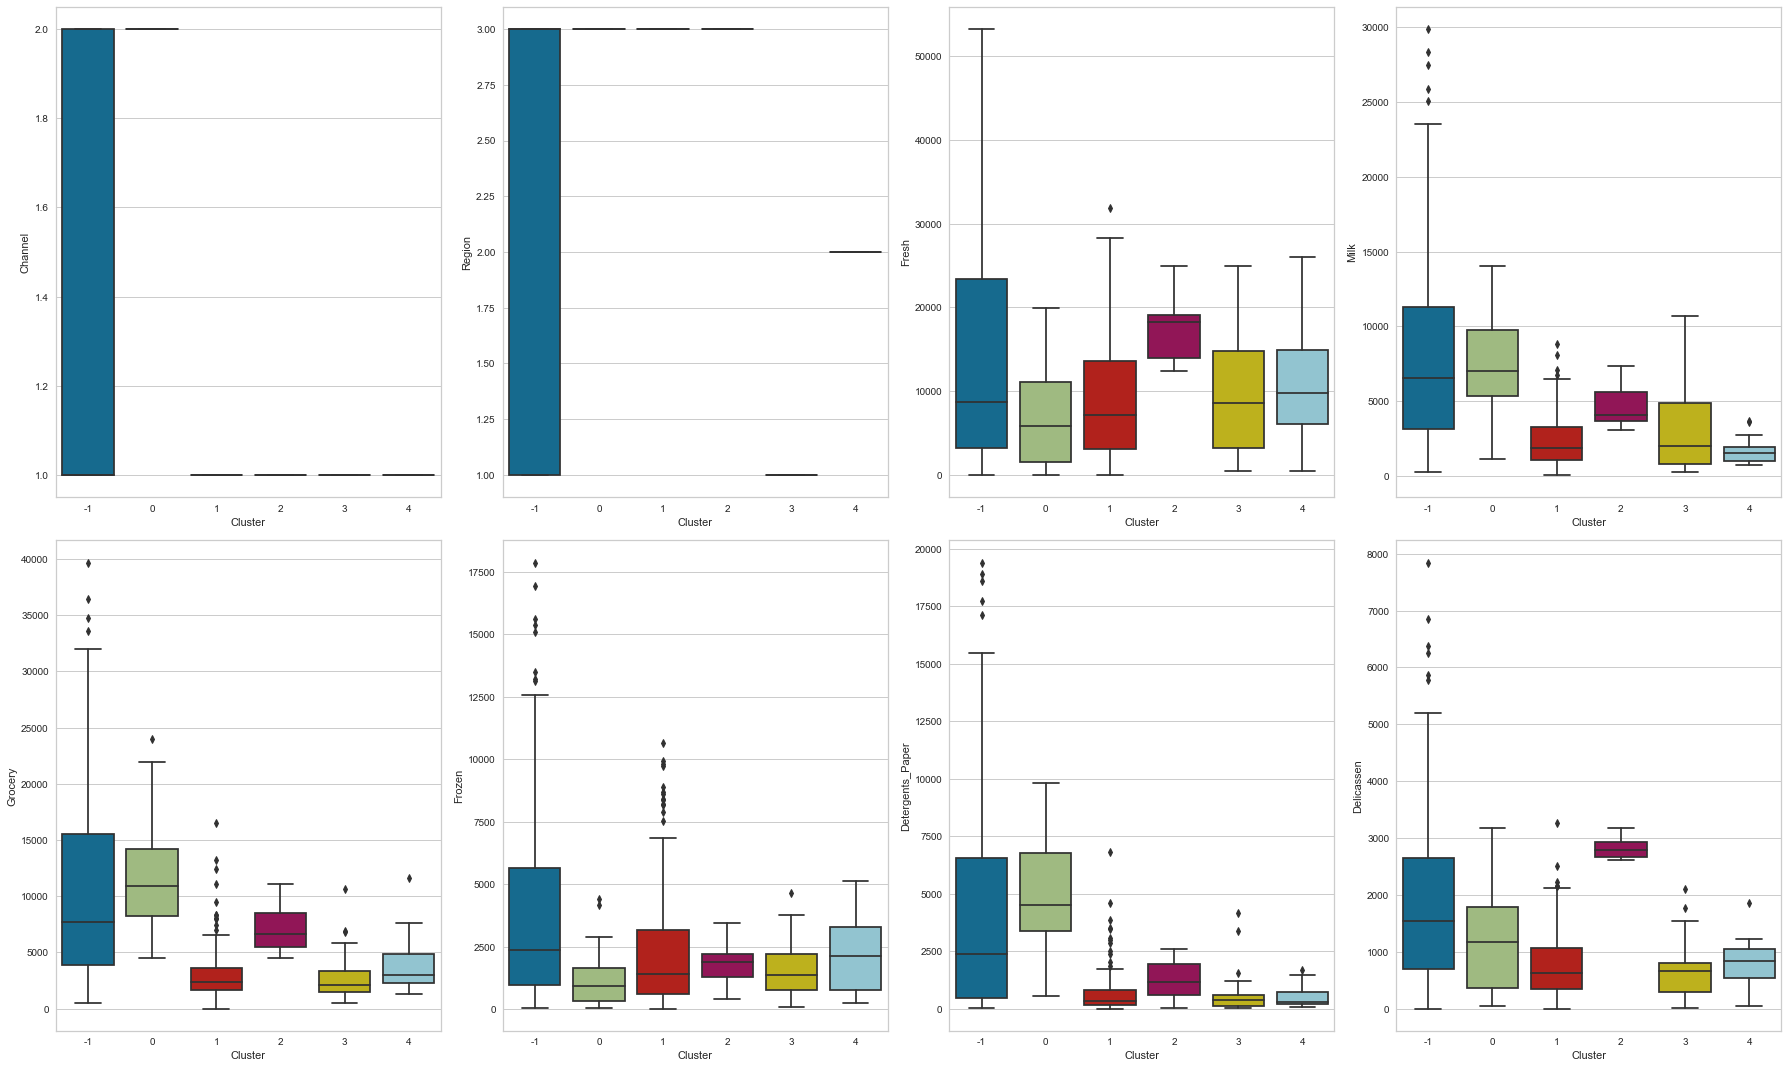

                Channel    Region         Fresh         Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.482517  2.230769  14330.524476  8070.860140  10940.993007   
 0             2.000000  3.000000   6898.833333  7364.439394  11518.348485   
 1             1.000000  3.000000   9107.928571  2318.285714   3044.798701   
 2             1.000000  3.000000  17605.500000  4692.833333   7186.333333   
 3             1.000000  1.000000   9384.030303  2858.454545   2848.787879   
 4             1.000000  2.000000  10759.052632  1711.947368   3834.157895   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             3866.741259       4251.944056  1963.370629  3.405594  
 0             1156.287879       4933.939394  1170.318182  5.924242  
 1             2350.000000        663.032468   767.266234  1.454545  
 2             1842.83333

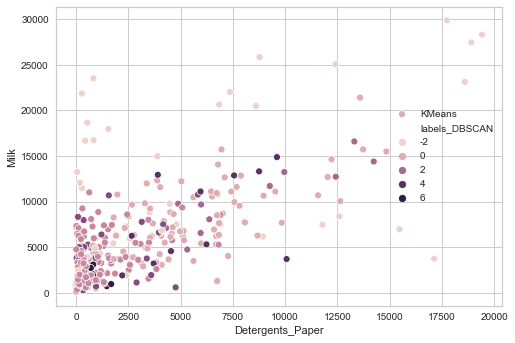

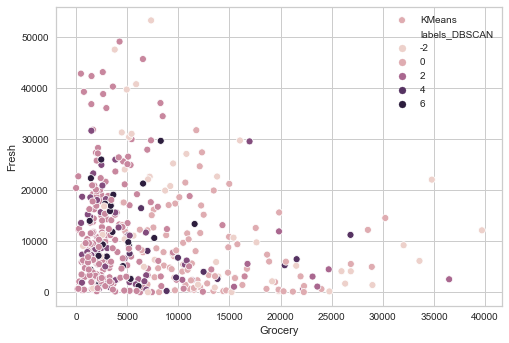

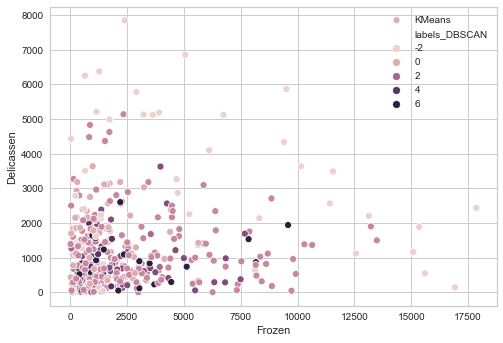

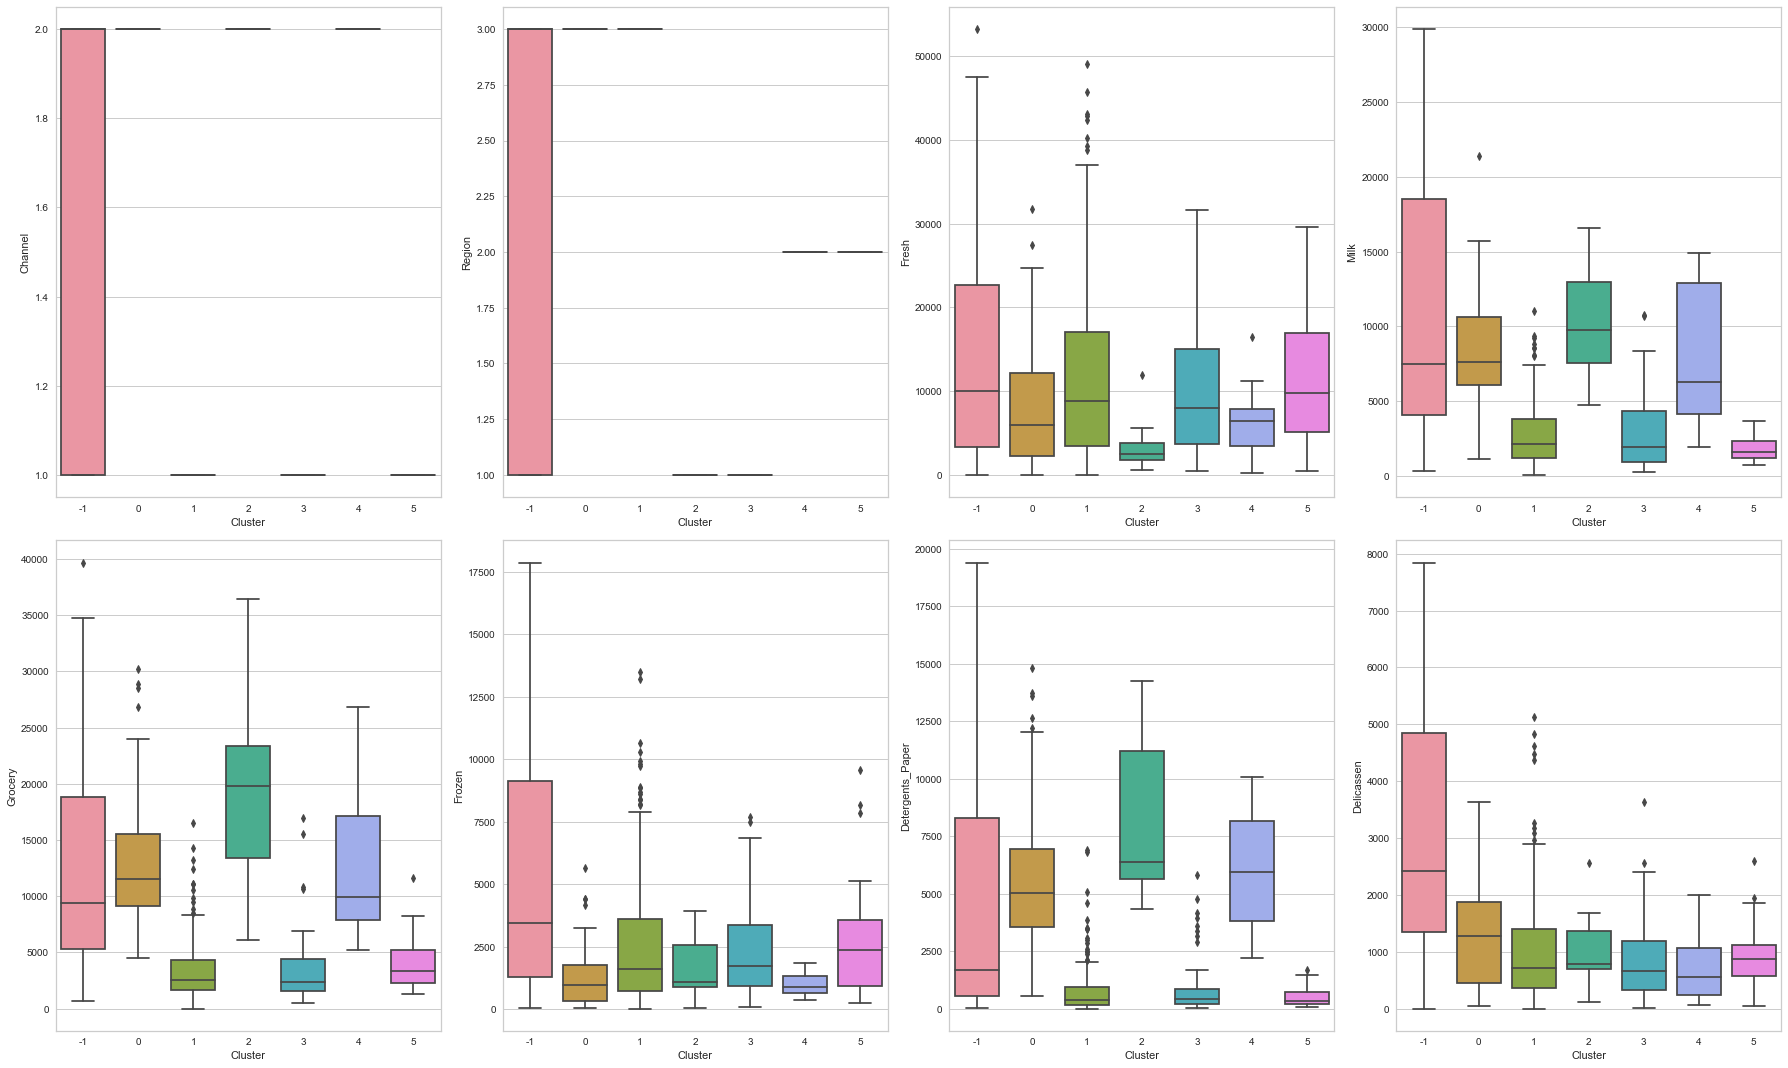

                Channel   Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.608696  2.23913  14535.217391  11238.913043  13173.521739   
 0             2.000000  3.00000   8077.200000   8097.458824  12973.223529   
 1             1.000000  3.00000  11801.291667   2833.307292   3428.140625   
 2             2.000000  1.00000   3420.272727  10414.363636  19091.090909   
 3             1.000000  1.00000  10004.725490   2989.862745   3616.235294   
 4             2.000000  2.00000   6507.454545   8181.363636  12935.272727   
 5             1.000000  2.00000  11458.440000   1836.400000   4000.880000   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             5493.065217       4961.456522  2965.521739  2.173913  
 0             1291.952941       5648.964706  1307.388235  5.941176  
 1             26

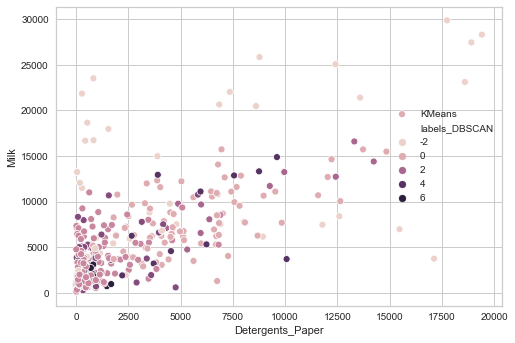

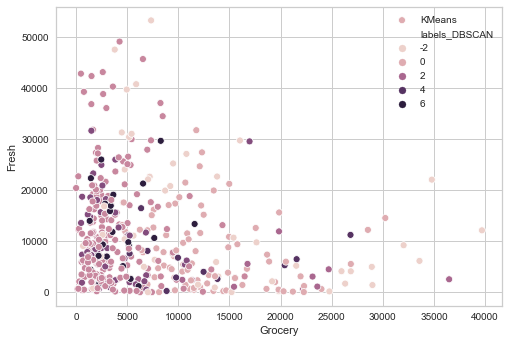

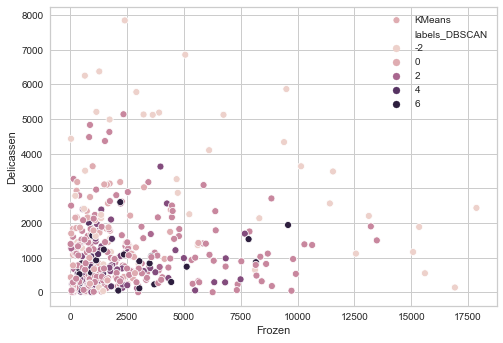

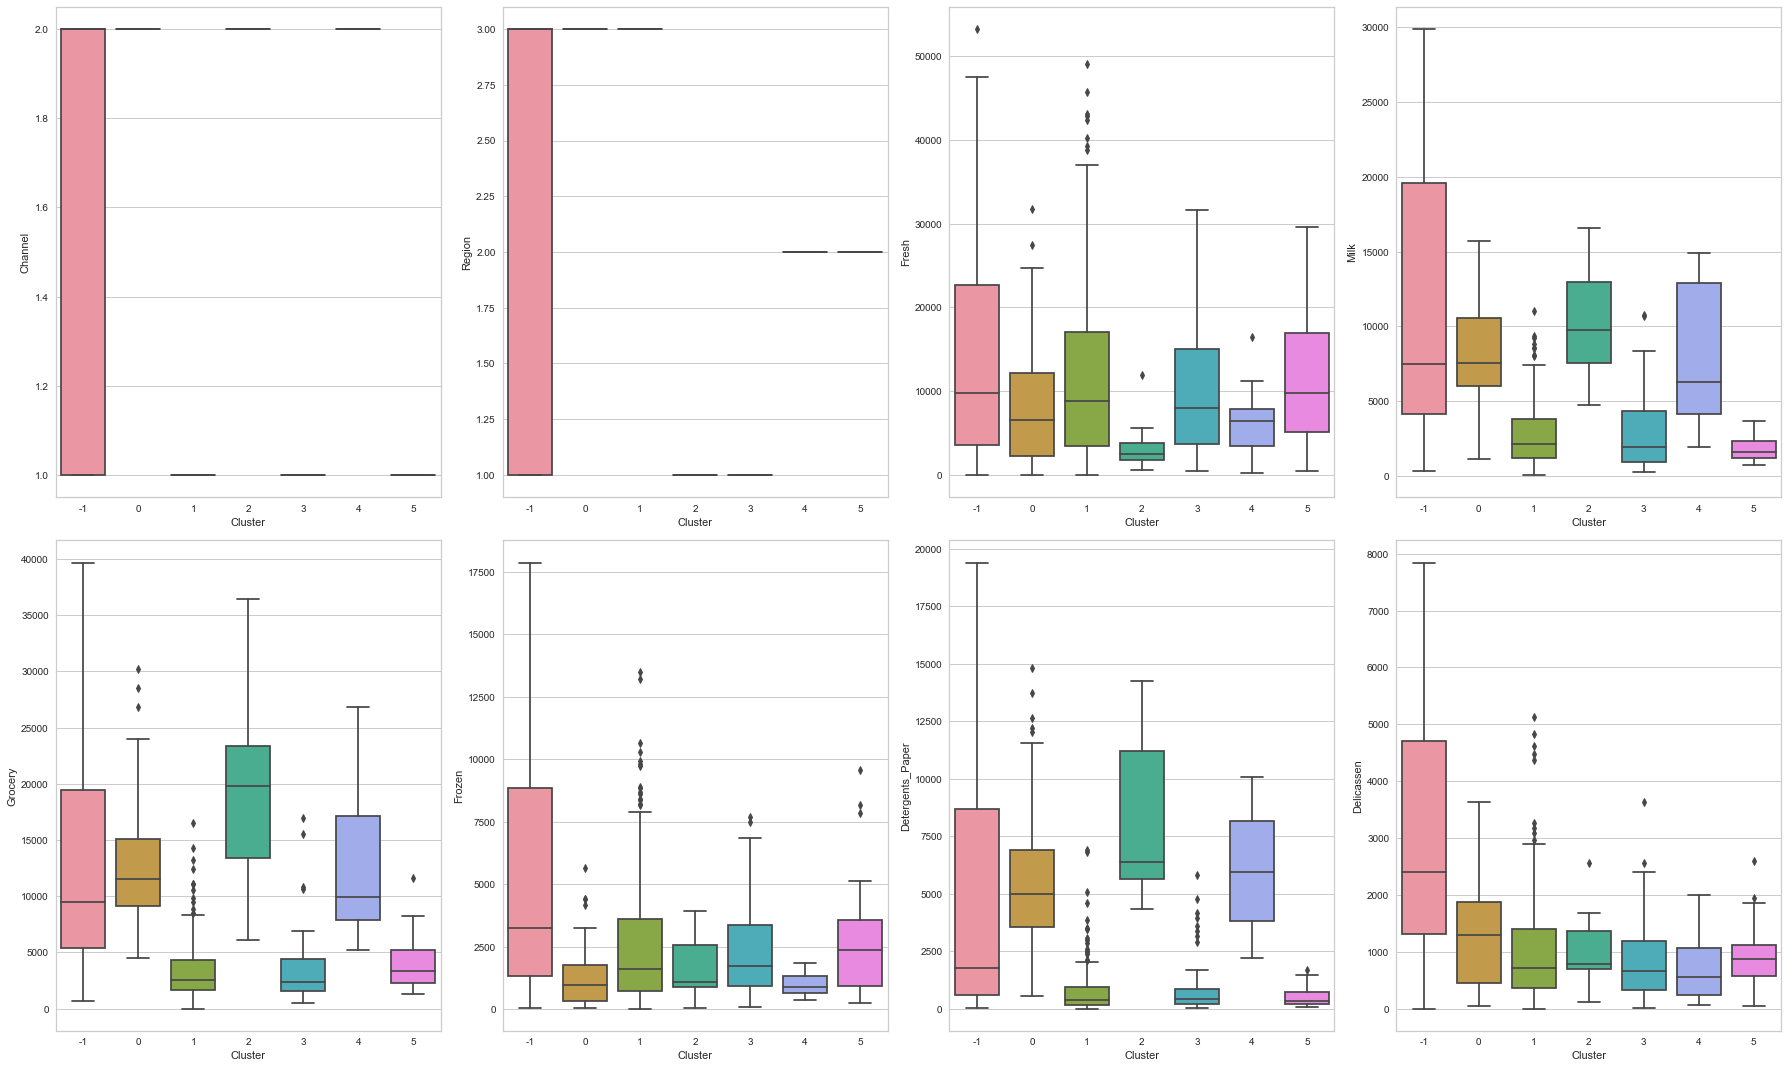

                Channel    Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                 
-1             1.617021  2.255319  14331.638298  11455.361702  13508.574468   
 0             2.000000  3.000000   8114.226190   7938.952381  12783.369048   
 1             1.000000  3.000000  11801.291667   2833.307292   3428.140625   
 2             2.000000  1.000000   3420.272727  10414.363636  19091.090909   
 3             1.000000  1.000000  10004.725490   2989.862745   3616.235294   
 4             2.000000  2.000000   6507.454545   8181.363636  12935.272727   
 5             1.000000  2.000000  11458.440000   1836.400000   4000.880000   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             5414.446809       5144.893617  2927.170213  2.255319  
 0             1285.928571       5554.511905  1309.107143  5.940476  
 1      

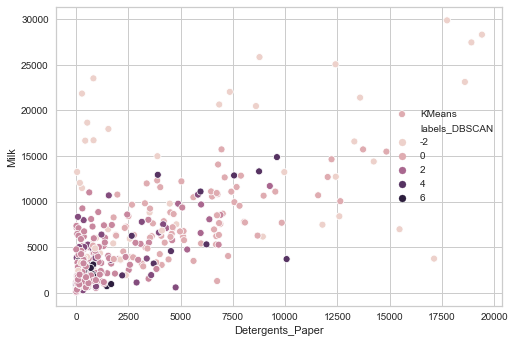

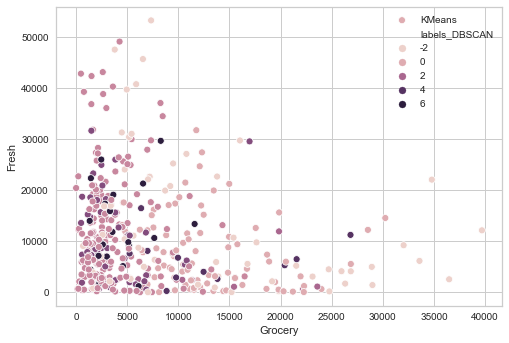

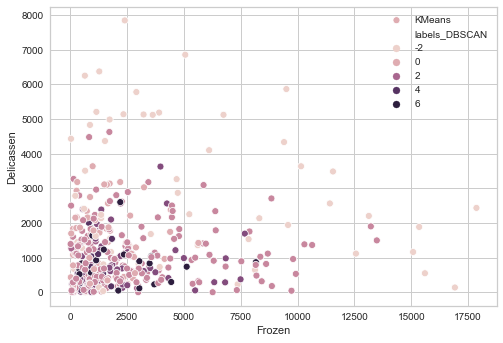

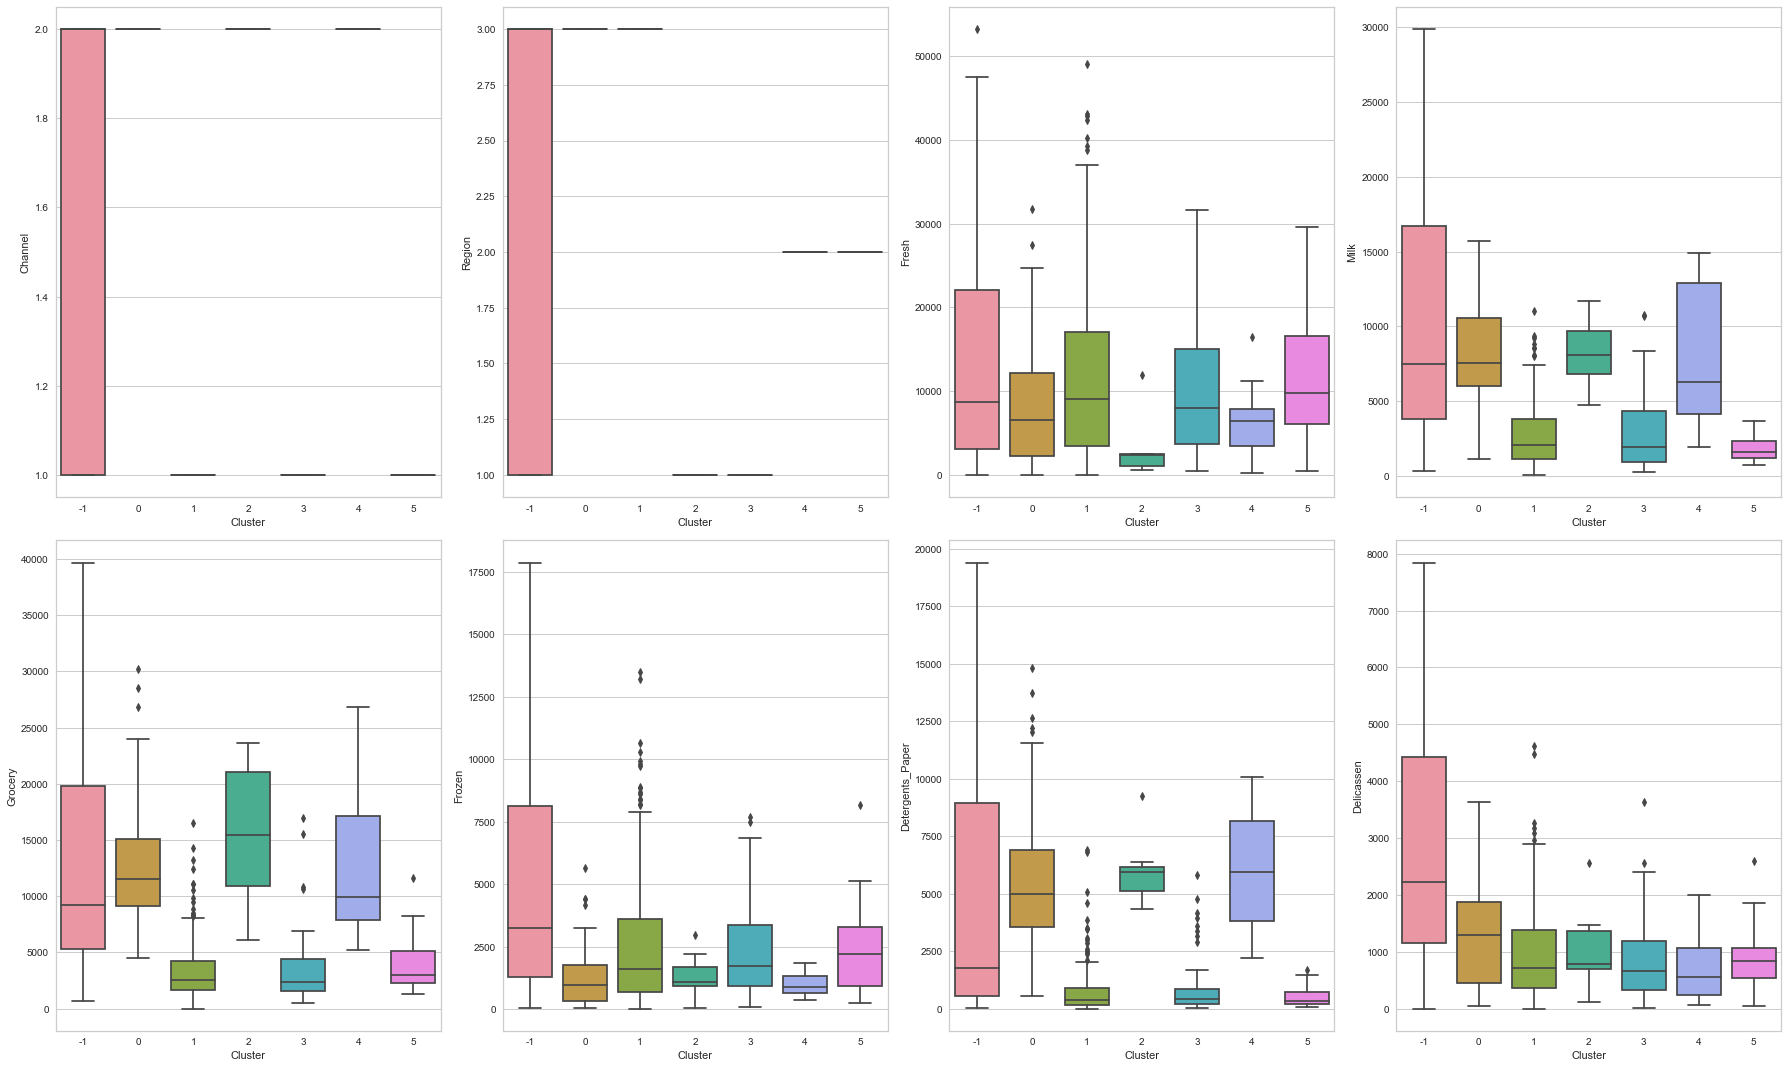

                Channel    Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                 
-1             1.578947  2.210526  13493.473684  10814.877193  13373.157895   
 0             2.000000  3.000000   8114.226190   7938.952381  12783.369048   
 1             1.000000  3.000000  11731.329787   2799.537234   3407.686170   
 2             2.000000  1.000000   3141.428571   8227.285714  15559.142857   
 3             1.000000  1.000000  10004.725490   2989.862745   3616.235294   
 4             2.000000  2.000000   6507.454545   8181.363636  12935.272727   
 5             1.000000  2.000000  11604.826087   1848.391304   3969.608696   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             5132.859649       5207.052632  2798.192982  2.456140  
 0             1285.928571       5554.511905  1309.107143  5.940476  
 1      

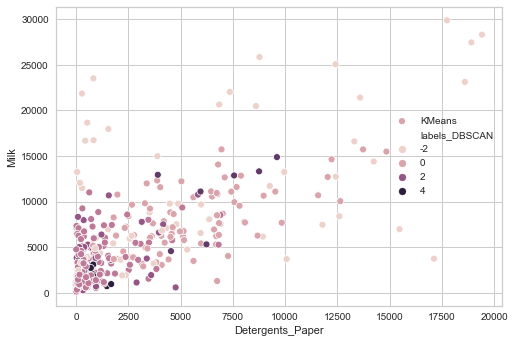

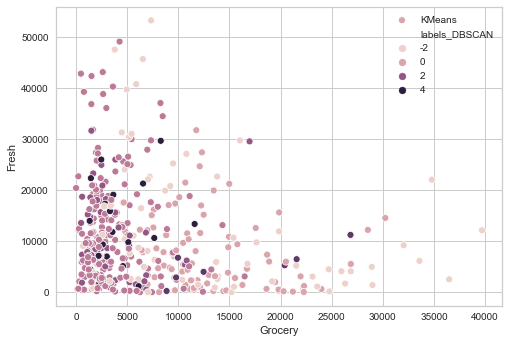

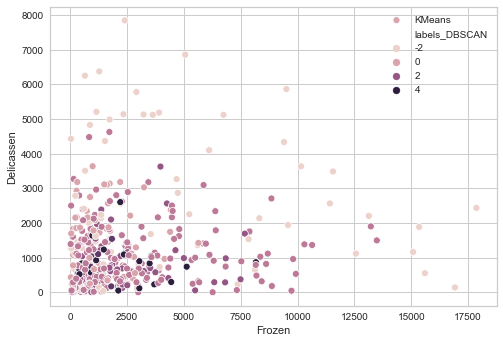

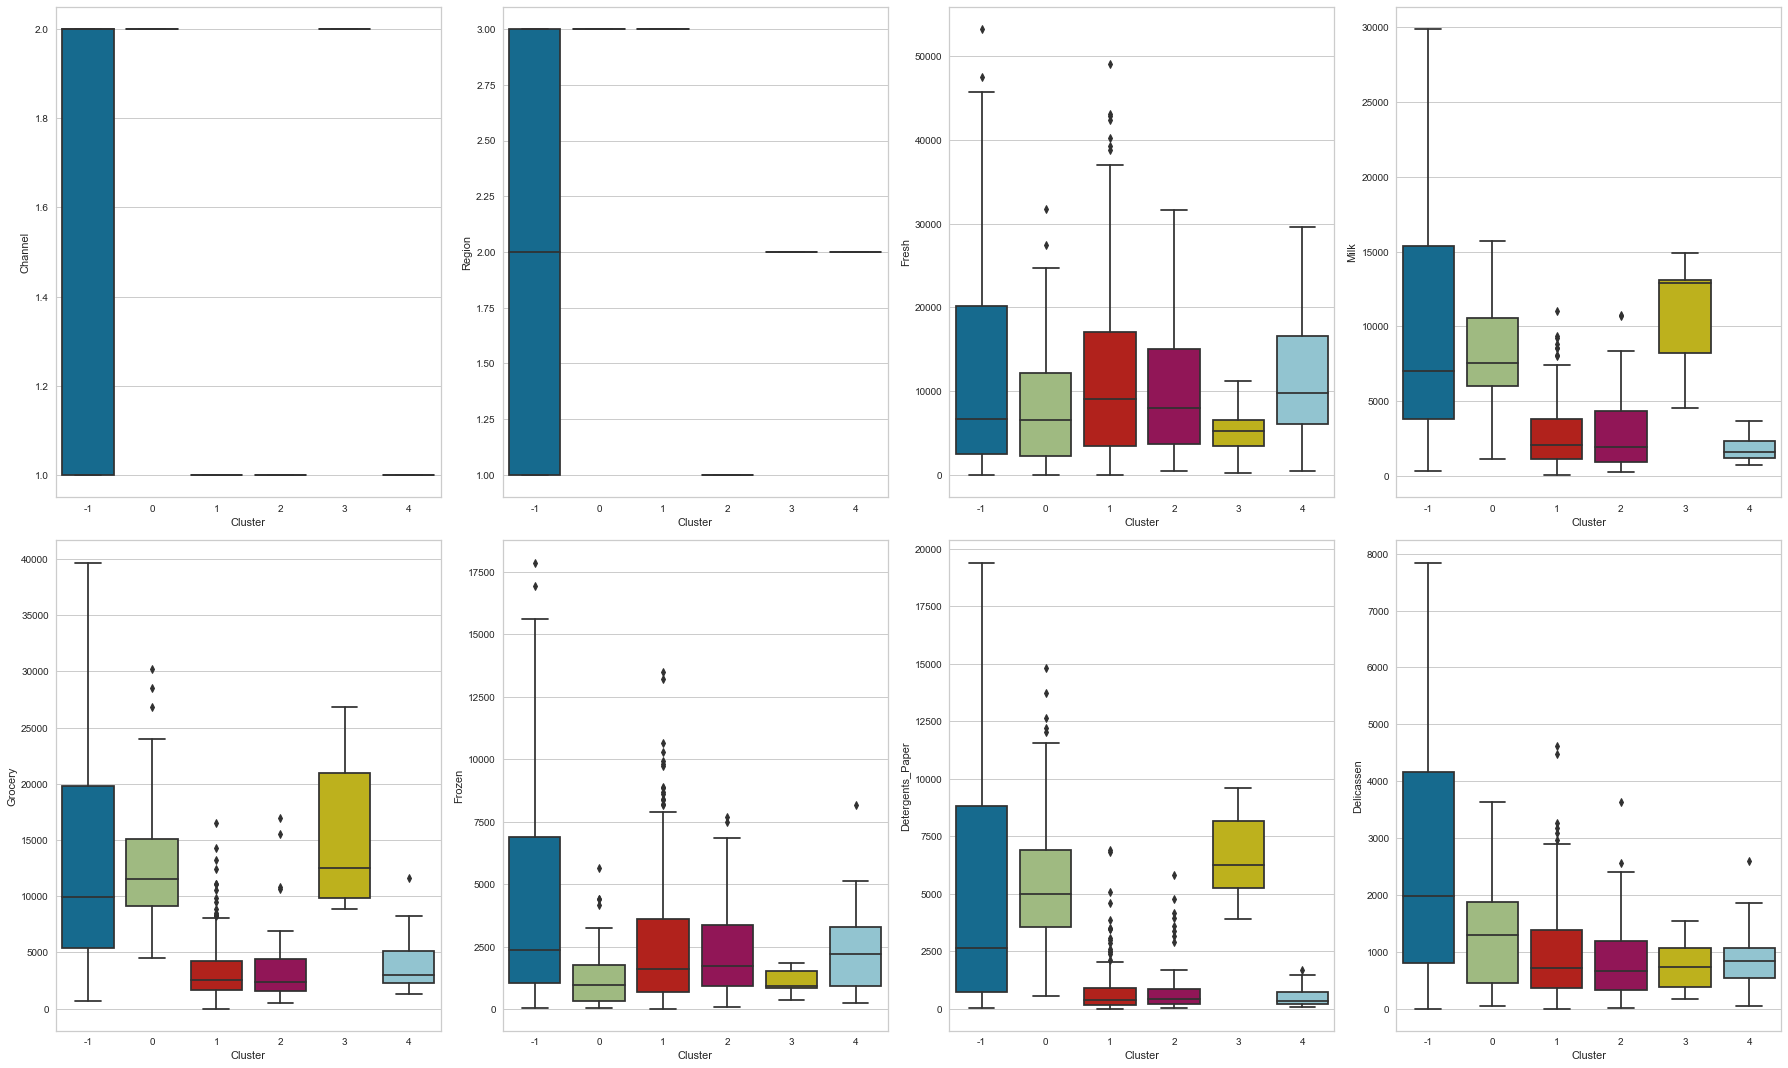

                Channel    Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                 
-1             1.647059  2.073529  12144.750000  10133.323529  13288.132353   
 0             2.000000  3.000000   8114.226190   7938.952381  12783.369048   
 1             1.000000  3.000000  11731.329787   2799.537234   3407.686170   
 2             1.000000  1.000000  10004.725490   2989.862745   3616.235294   
 3             2.000000  2.000000   5265.285714  10709.714286  15697.000000   
 4             1.000000  2.000000  11604.826087   1848.391304   3969.608696   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             4486.073529       5257.955882  2499.426471  2.794118  
 0             1285.928571       5554.511905  1309.107143  5.940476  
 1             2653.760638        749.015957   959.308511  1.686170  
 2             23

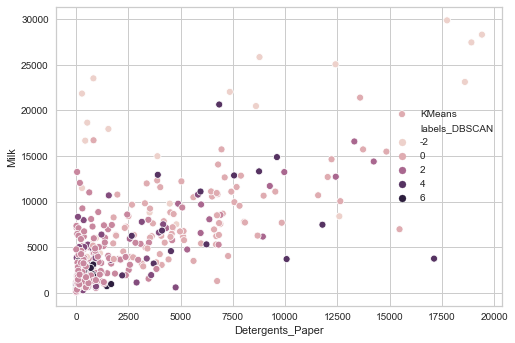

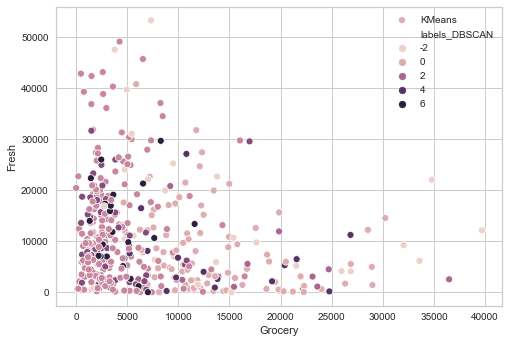

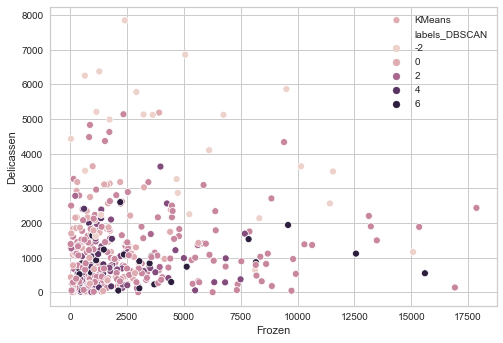

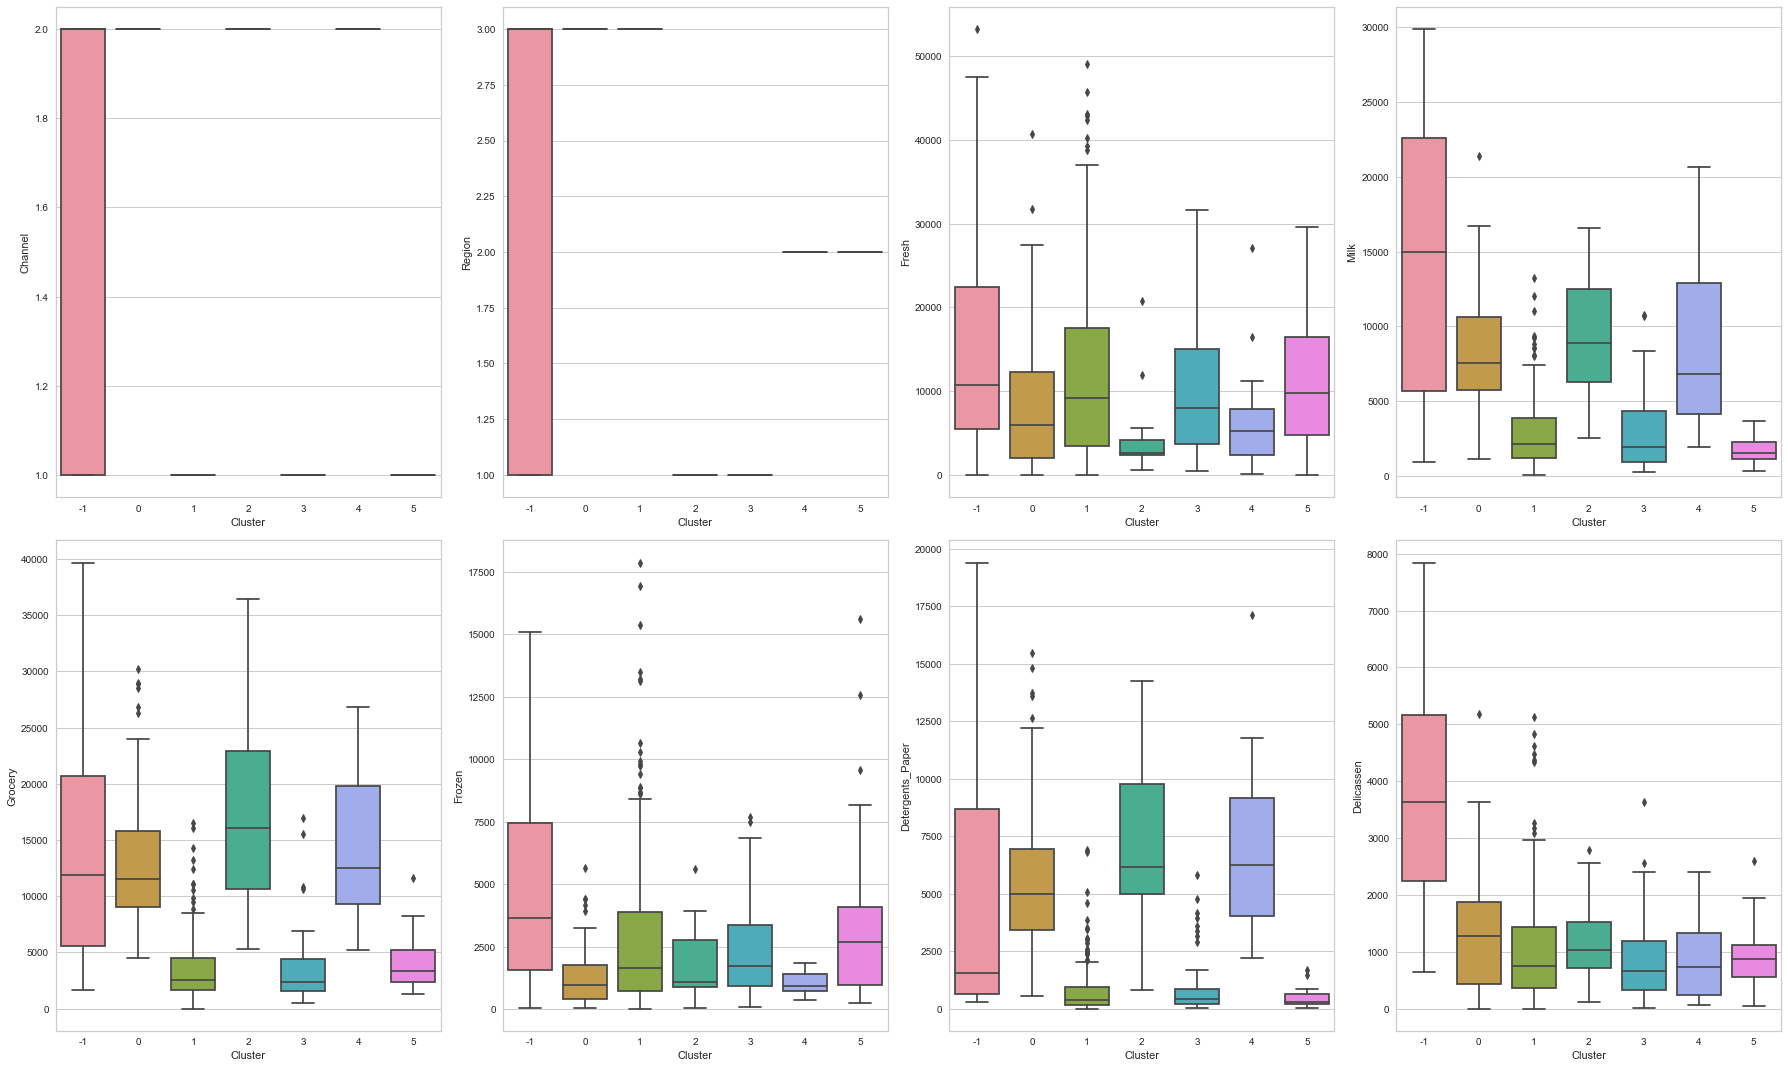

               Channel    Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.62963  2.148148  15613.888889  14576.259259  14662.629630   
 0             2.00000  3.000000   8460.595506   8104.528090  13158.426966   
 1             1.00000  3.000000  12032.792929   2925.813131   3504.025253   
 2             2.00000  1.000000   4589.785714   9225.714286  17028.214286   
 3             1.00000  1.000000  10004.725490   2989.862745   3616.235294   
 4             2.00000  2.000000   6792.000000   8577.600000  14039.333333   
 5             1.00000  2.000000  10870.296296   1767.962963   4053.629630   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             4911.703704       5586.666667  3874.148148  1.259259  
 0             1307.775281       5627.314607  1321.696629  5.842697  
 1             29

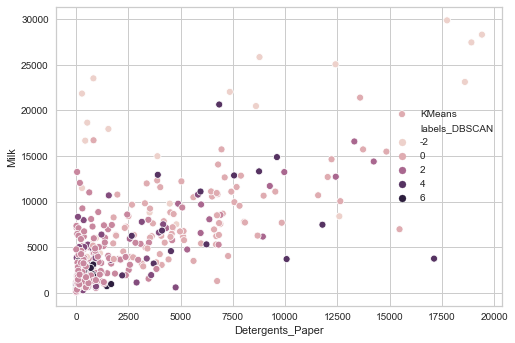

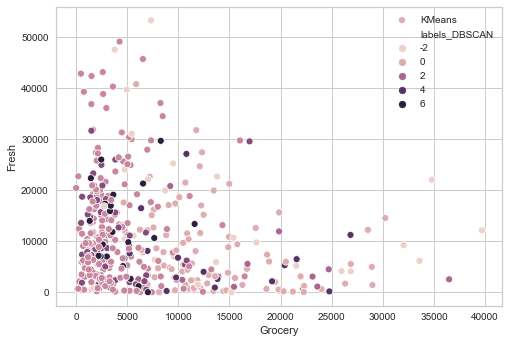

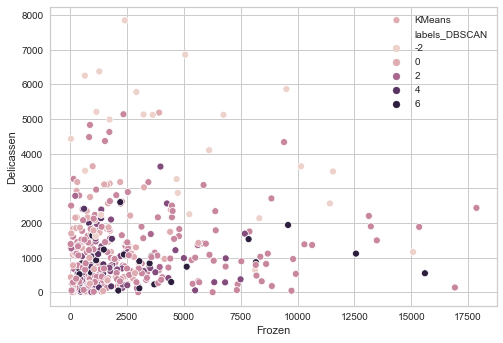

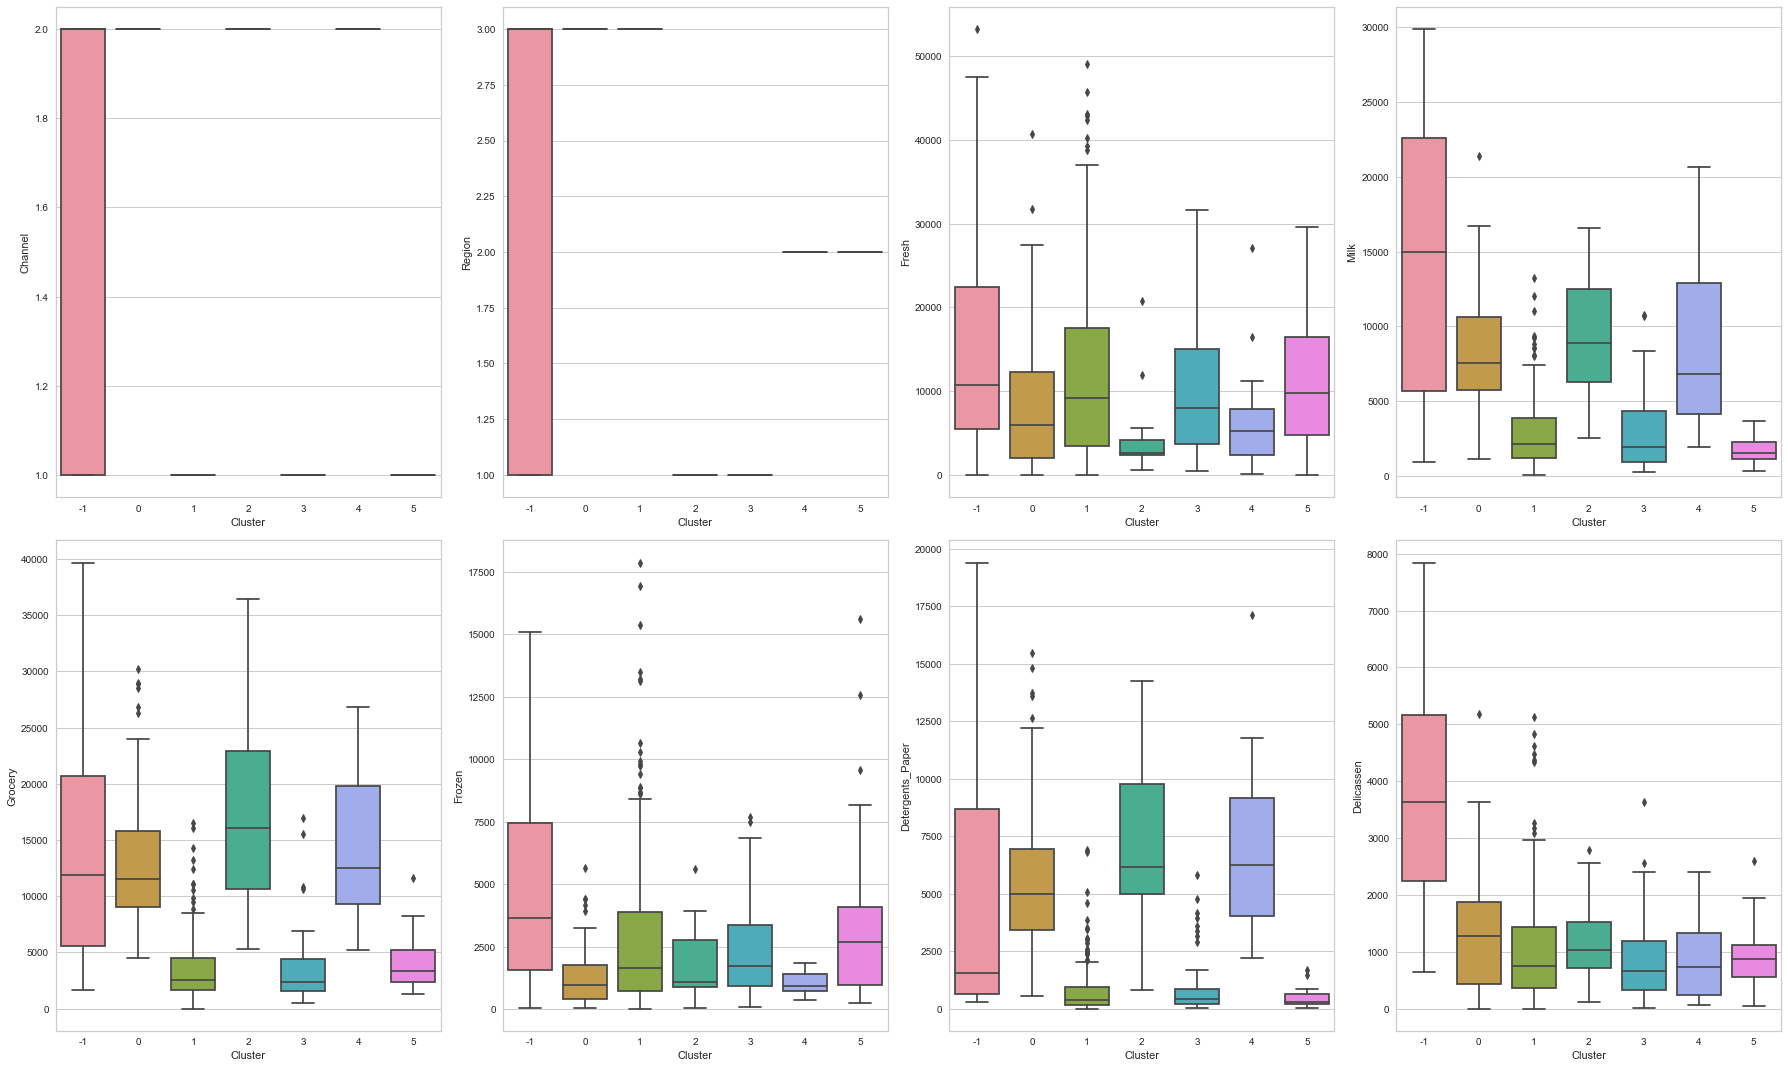

               Channel    Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.62963  2.148148  15613.888889  14576.259259  14662.629630   
 0             2.00000  3.000000   8460.595506   8104.528090  13158.426966   
 1             1.00000  3.000000  12032.792929   2925.813131   3504.025253   
 2             2.00000  1.000000   4589.785714   9225.714286  17028.214286   
 3             1.00000  1.000000  10004.725490   2989.862745   3616.235294   
 4             2.00000  2.000000   6792.000000   8577.600000  14039.333333   
 5             1.00000  2.000000  10870.296296   1767.962963   4053.629630   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             4911.703704       5586.666667  3874.148148  1.259259  
 0             1307.775281       5627.314607  1321.696629  5.842697  
 1             29

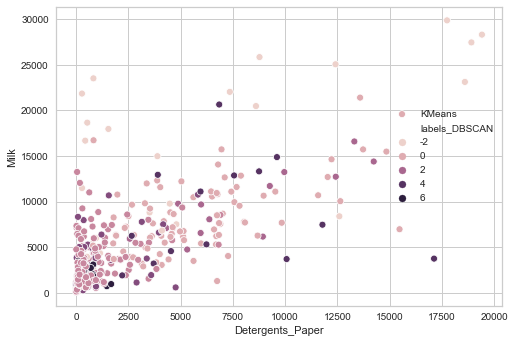

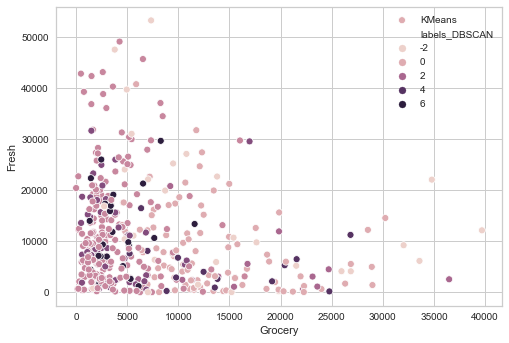

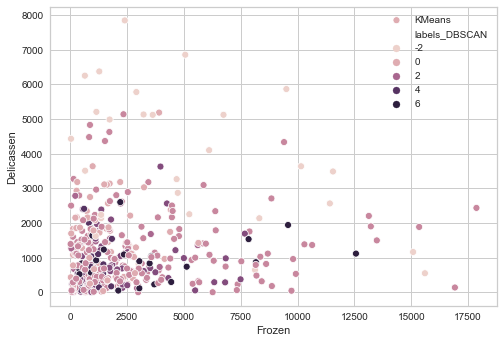

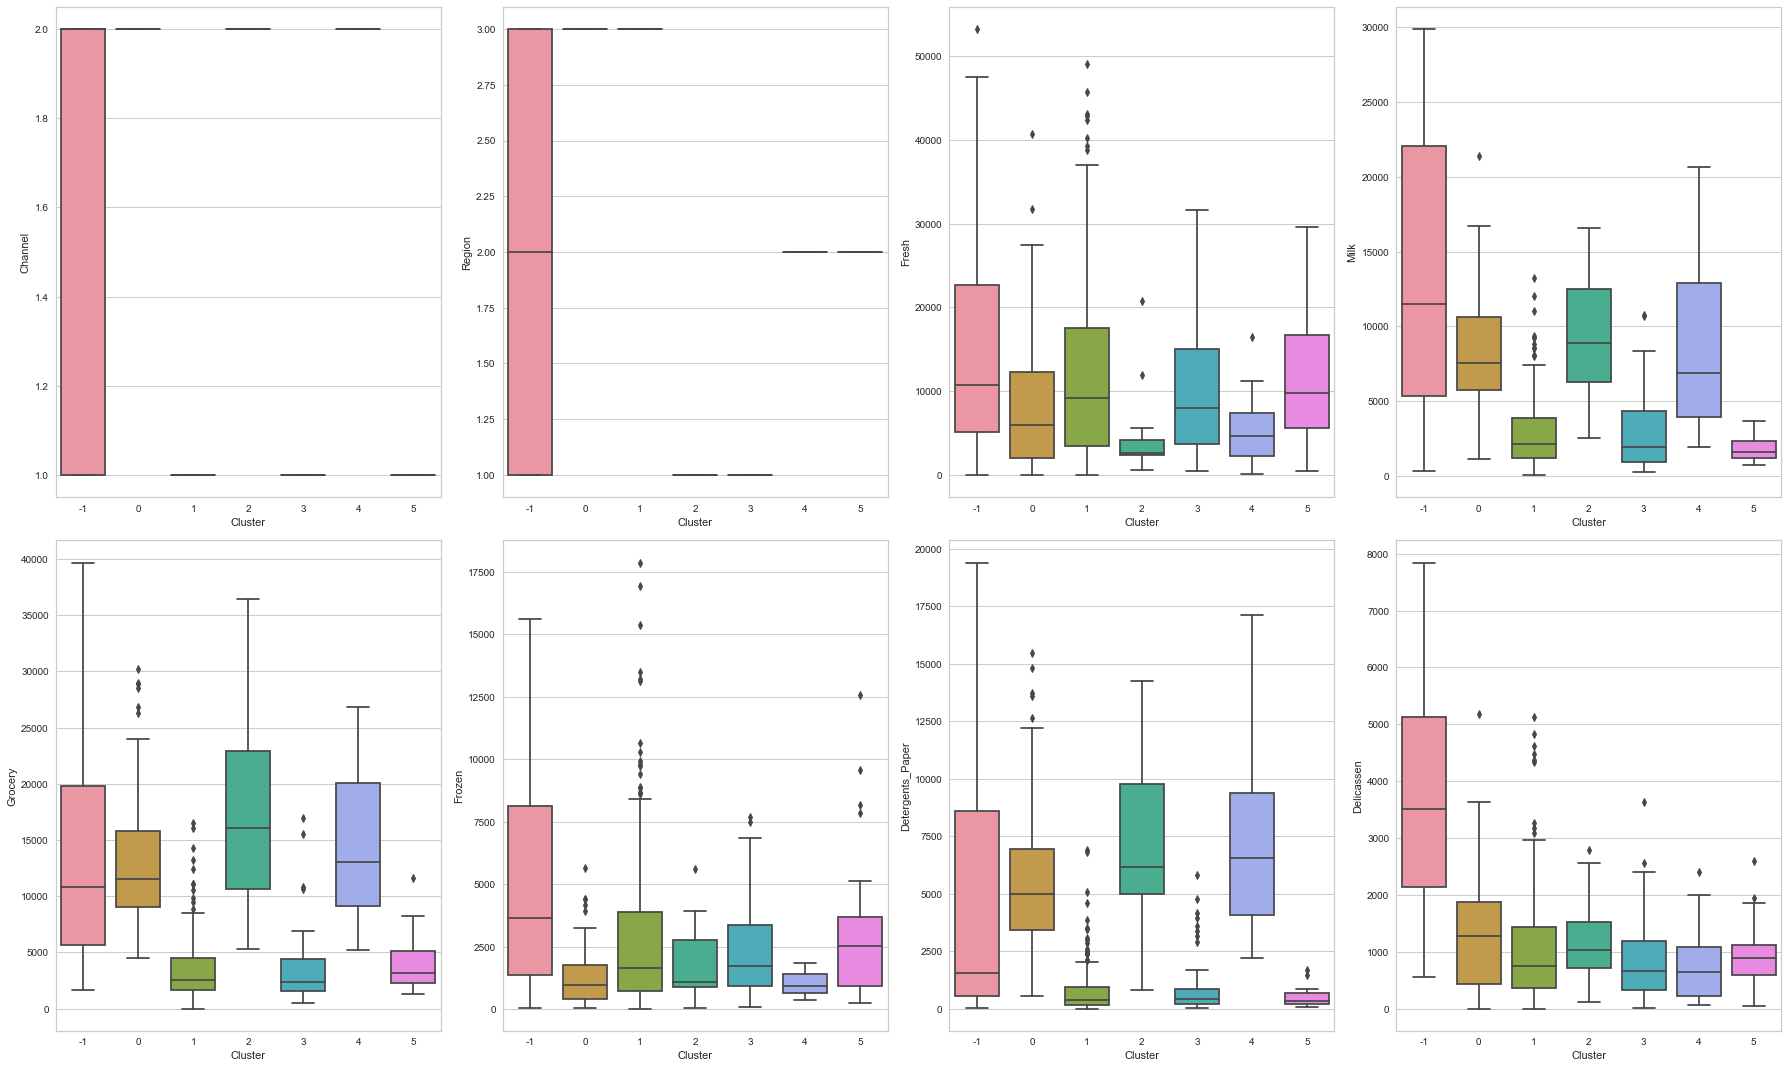

               Channel    Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.62069  2.137931  15471.034483  13817.551724  14265.586207   
 0             2.00000  3.000000   8460.595506   8104.528090  13158.426966   
 1             1.00000  3.000000  12032.792929   2925.813131   3504.025253   
 2             2.00000  1.000000   4589.785714   9225.714286  17028.214286   
 3             1.00000  1.000000  10004.725490   2989.862745   3616.235294   
 4             2.00000  2.000000   5342.714286   8703.357143  14271.428571   
 5             1.00000  2.000000  11288.269231   1823.153846   3939.500000   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             5158.000000       5343.655172  3699.689655  1.310345  
 0             1307.775281       5627.314607  1321.696629  5.842697  
 1             29

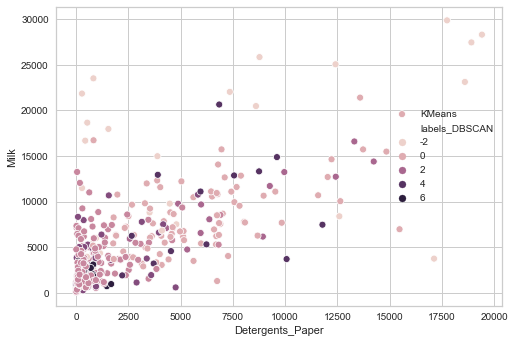

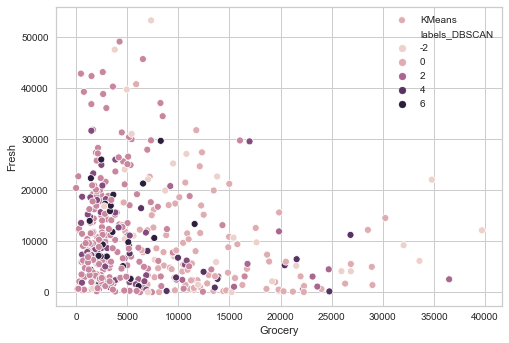

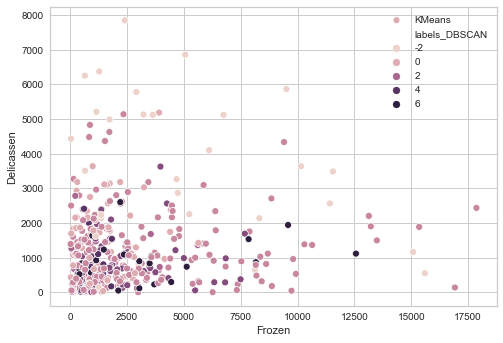

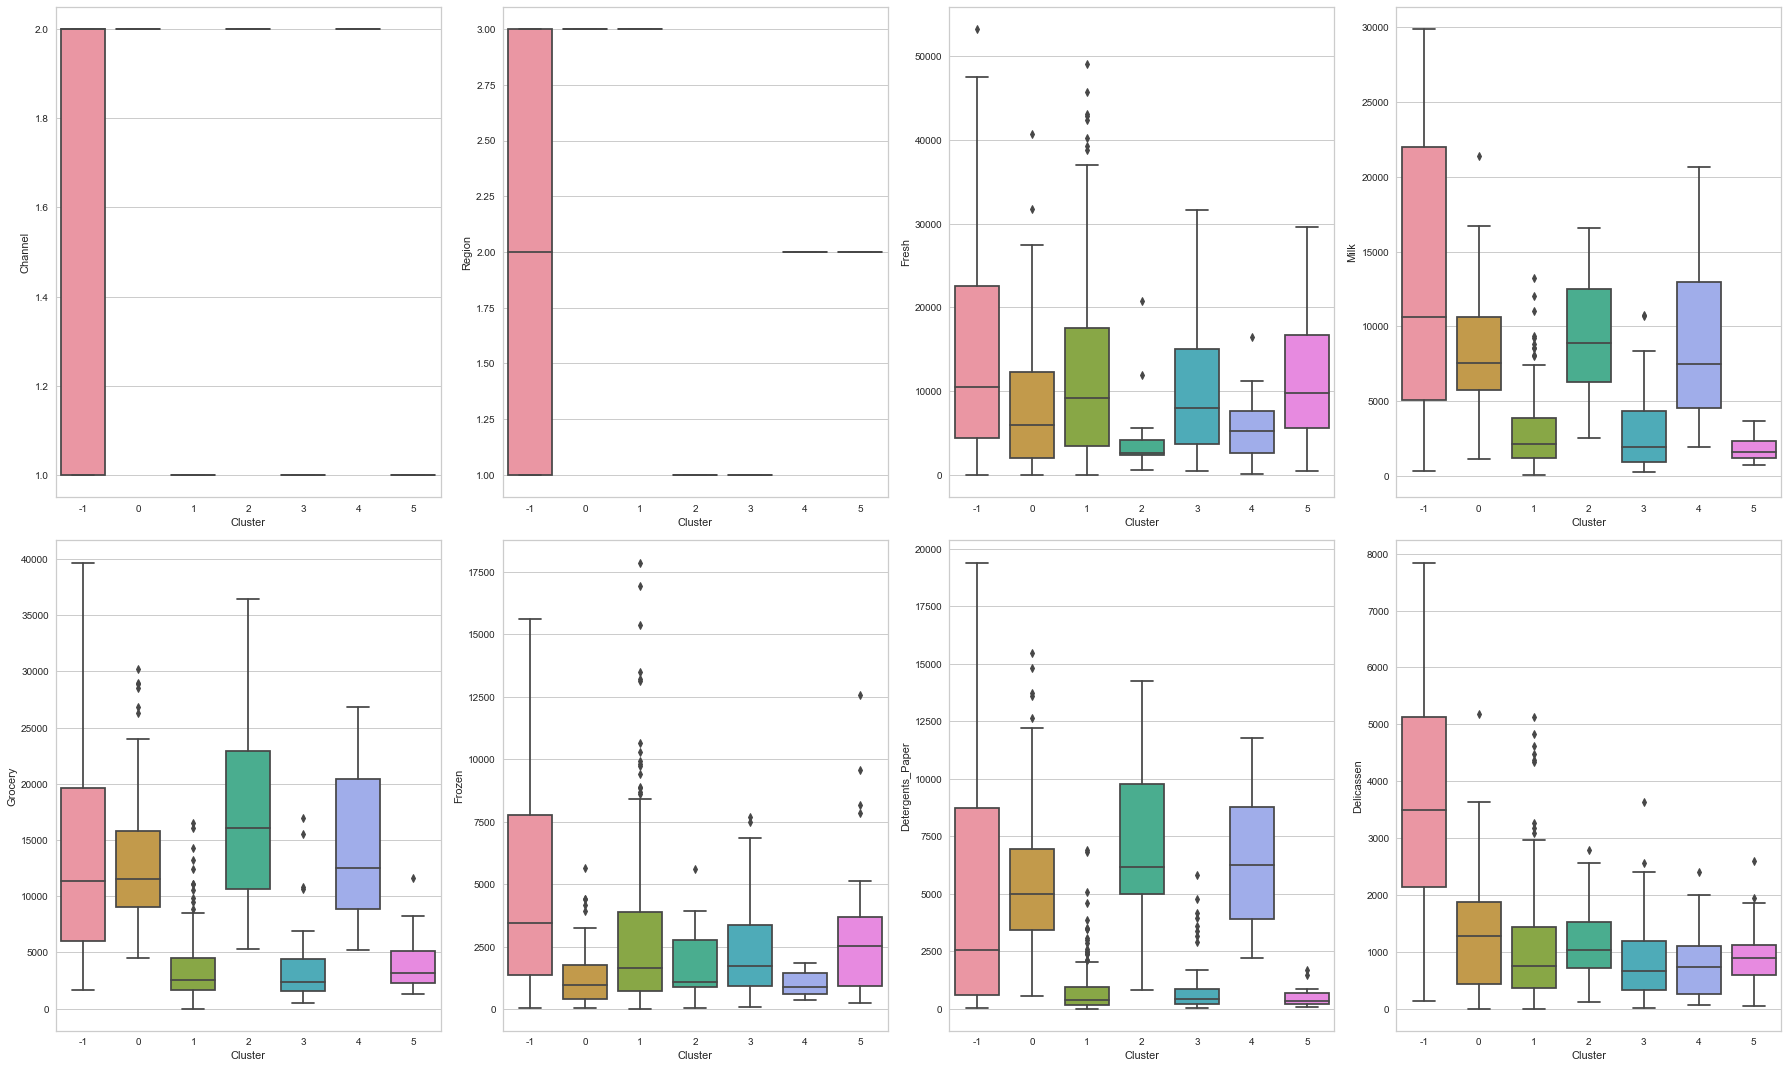

                Channel    Region         Fresh          Milk       Grocery  \
labels_DBSCAN                                                                 
-1             1.633333  2.133333  15026.566667  13481.533333  14429.133333   
 0             2.000000  3.000000   8460.595506   8104.528090  13158.426966   
 1             1.000000  3.000000  12032.792929   2925.813131   3504.025253   
 2             2.000000  1.000000   4589.785714   9225.714286  17028.214286   
 3             1.000000  1.000000  10004.725490   2989.862745   3616.235294   
 4             2.000000  2.000000   5589.307692   9085.384615  13894.461538   
 5             1.000000  2.000000  11288.269231   1823.153846   3939.500000   

                    Frozen  Detergents_Paper   Delicassen    labels  
labels_DBSCAN                                                        
-1             5028.533333       5736.200000  3581.100000  1.333333  
 0             1307.775281       5627.314607  1321.696629  5.842697  
 1      

In [66]:
for j in range(10,25,5):
    for i in range(4,8):
        dbscan=DBSCAN(eps=j/10,min_samples=i)
        dbscan.fit(X)
        print(f'Model eps={j/10}, min={i} Silhouette Score: {format(silhouette_score(X, dbscan.labels_))}')
        customers_clean['labels_DBSCAN']=dbscan.labels_
        sns.scatterplot(x='Detergents_Paper',y='Milk',hue='labels_DBSCAN',data=customers_clean,label='KMeans')
        plt.show()
        sns.scatterplot(x='Grocery',y='Fresh',hue='labels_DBSCAN',data=customers_clean,label='KMeans')
        plt.show()
        sns.scatterplot(x='Frozen',y='Delicassen',hue='labels_DBSCAN',data=customers_clean,label='KMeans')
        plt.show()
        fig, axes = plt.subplots(2,4, figsize=(25,15))
        for i,ax in enumerate(axes.flat):
            sns.boxplot(x='labels_DBSCAN', y=customers_clean.columns[i], data=customers_clean,ax=ax)
            ax.set_xlabel('Cluster')
            ax.set_ylabel(customers_clean.columns[i])
        plt.tight_layout()
        plt.show()
        print(customers_clean.groupby('labels_DBSCAN').mean())